<div style="display: flex; align-items: center; justify-content: left; padding: 0px;">
    <div class="logo-container" style="flex:0.13;height:100%;">
        <img src="https://raw.githubusercontent.com/andikaaa18/Tripleten_datascience_project/main/Assets/logo_tripleten.png" alt="Logo" style="max-height: 155px; width: auto; filter:invert(0%);">
    </div>
    <div class="title-container" style="flex:0.85;height:75%;text-align: left">
        <div style="margin: 0px 0px 0px 0px; font-size: 40px; font-family:Trebuchet MS; font-weight:bold; line-height:40px;">Tripleten Indonesia Project</div>
        <div style="margin: 0px 0px 0px 0px; font-size: 30px; font-family:Trebuchet MS;">&mdash; Sprint 9 : Machine Learning Dalam Bisnis</div>
    </div>
</div>

<hr style="width:95%;height:2px;background-color:black;" align="left">

<div style="font-family:Trebuchet MS; font-weight:bold; font-size:35px; text-align:left; line-height:40px">
Identifying the Best Oil Well Exploration Locations for a Mining Company
</div>
<div style="font-family:Trebuchet MS; font-weight:regular; font-size:20px; text-align:left; ">
&mdash; Memadukan model prediktif volume cadangan minyak, perhitungan bisnis dan statistik untuk perhitungan potensi keuntungan dan risiko.
</div>

# **A. Pendahuluan**

## 1) Deskripsi Proyek

<h3 style="font-family:Trebuchet MS; font-weight:bold; padding-bottom:0px">Perusahaan tambang OilyGiant akan mengembangkan 200 titik sumur minyak baru.</h3>

<div style="margin-left:2%; width:95%; text-align:justify">

Saat ini kita bekerja di perusahaan tambang **OilyGiant**. **OilyGiant** berencana untuk mengembangkan 200 titik sumur minyak baru dalam bisnis mereka pada suatu wilayah tertentu. Perusahaan ini memiliki informasi mengenai volume cadangan minyak sejumlah sumur pada tiga wilayah berbeda dan akan digunakan dalam proses pembangunan model *machine learning* pada proyek ini.
</div>

## 2) Tujuan dan Alur Proses

<h3 style="font-family:Trebuchet MS; font-weight:bold">Tujuan</h3>
<div style="margin-left:2%; width:95%; text-align:justify">

Terdapat sejumlah tujuan yang ingin dicapai pada proyek ini, diantaranya:
1. Menghasilkan model yang dapat memprediksi volume cadangan minyak di sumur-sumur baru dengan akurasi tinggi.
2. Memilih wilayah dan 200 sumur minyak dengan probabilitas resiko kerugian kurang dari 2.5% untuk keperluan perluasan titik eksplorasi.
</div>

<h3 style="font-family:Trebuchet MS; font-weight:bold">Alur Proyek</h3>
<div style="margin-left:2%; width:95%;text-align:justify">

Adapun proses yang akan dilakukan dalam proses analis untuk proyek ini terdiri dari beberapa langkah utama, yaitu:
1. **Ikhtisar Data.** <div> Pada bagian ini, data yang telah diimpor akan dipahami setiap parameter pada dataset serta menimbang kecukupan data dalam menjawab kebutuhan proyek.</div>        
2. **Mempersiapkan Data.** <div> Pada bagian ini, data yang telah diimpor akan dilakukan proses eksplorasi untuk melihat berbagai permasalahan pada data kemudian dilanjutkan dengan perbaikan data. Apabila diperlukan, reduksi dan pengayaan data akan dilakukan untuk membuang informasi yang tidak relevan dan memperkaya informasi pada dataset. Hasil akhir dari proses ini yaitu dataset yang siap untuk dilakukan proses analisis.</div>        
3. **Analisa Data Eksploratif.** <div> Pada bagian ini, data yang telah dipersiapkan akan dilakukan sejumlah perhitungan statistik deskriptif dan menampilkan sejumlah visualisasi data untuk melihat pola-pola tertentu.</div>
4. **Membangun Model *Machine-learning*.** <div> Pada bagian ini akan dilakukan sejumlah proses, diantaranya: *feature engineering*, *model training* dan evaluasi model.</div>
5. **Menghitung Valuasi Bisnis.** <div> Pada bagian ini akan dilakukan sejumlah perhitungan bisnis seperti perhitungan *cost*, *profit*, resiko bisnis, dll.
</div>

</div>

## 3) Batasan Masalah

<h3 style="font-family:Trebuchet MS; font-weight:bold">Batasan Masalah</h3>
<div style="margin-left:2%; width:95%; text-align:justify">

Terdapat sejumlah batasan masalah pada proyek ini, baik hal-hal yang terkait dengan proses permodelan *machine learning* maupun prose bisnis, yang diantaranya:
1. **Hanya regresi linierlah yang cocok untuk pelatihan model** (sisanya tidak memadai untuk diprediksi).
2. Pada tahap eksplorasi, **sebanyak 500 sampel data akan diambil pada suatu area**. Melalui model prediktif akan **dipilih 200 titik terbaik yang akan dijadikan sumur minyak**.
3. Anggaran untuk mengembangkan 200 sumur minyak adalah **100 juta USD**.
4. Satu barel bahan mentah menghasilkan 4,5 USD pendapatan. **Pendapatan dari satu unit produk adalah 4.500 dolar** (1 unit produk = 1000 barel).
5. Setelah mengevaluasi risiko, pertahankan hanya wilayah dengan risiko kerugian **lebih rendah dari 2,5%**. Dari daftar wilayah yang memenuhi kriteria, pilihlah wilayah dengan rata-rata laba tertinggi.

</div>

# **B. Memuat Data**

* Memuat sejumlah *library* dan data yang dibutuhkan.

In [1]:
# import library untuk mengolah data
import pandas as pd, numpy as np

# import library untuk data viz
import matplotlib.pyplot as plt, seaborn as sns
import matplotlib.patheffects as pe

# import library untuk machine learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

# import library untuk model evaluation
from sklearn.metrics import r2_score, mean_squared_error

# import library untuk manage warning report
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# import library untuk utility
from tqdm import tqdm

In [2]:
# setting grafik untuk visualisasi data
%matplotlib inline
%config InlineBackend.figure_format = 'png'
%config InlineBackend.figure_format = 'retina'
plt.style.use('seaborn-v0_8')

In [3]:
# memuat dataset
try:
    geo_0 = pd.read_csv("../datasets/geo_data_0.csv")
    geo_1 = pd.read_csv("../datasets/geo_data_1.csv")
    geo_2 = pd.read_csv("../datasets/geo_data_2.csv")
except:
    geo_0 = pd.read_csv("/datasets/geo_data_0.csv")
    geo_1 = pd.read_csv("/datasets/geo_data_1.csv")
    geo_2 = pd.read_csv("/datasets/geo_data_2.csv")

# **C. Ikhtisar Data**

Berikut di bawah ini ditampilkan 10 baris data pada dataset yang akan dianalisis.

In [4]:
# menampilkan dataset geo data 0
print(f"{' Geo Data 0 ':=^60}\n")
print(f"Ukuran dataset : {geo_0.shape}")
geo_0.sample(10, random_state=20)

======================== Geo Data 0 ========================

Ukuran dataset : (100000, 5)


id        f0        f1        f2     product
45218  eyulM  2.145971  0.272529  3.710326  182.864726
74763  tuVSD  0.963782 -0.543793  2.120312   59.105359
43778  VbmJj  0.102345  1.003754 -1.201016  129.111677
75551  KBPXn -1.118781  0.125355  0.027691    3.291152
10086  BSRsb  0.204519  1.137973  3.602686   34.354086
78473  LsWuX  0.449097  1.099122  3.320249  133.814800
42516  QnweY  0.700631  0.729336  3.400695  107.992921
20723  6VSU3 -0.758954  0.706224  2.286406  115.899557
67116  oV3rW -0.571380  0.606224  2.587560   73.650075
86724  3j3Wi -0.433500  0.786195  5.389877  108.662529

In [5]:
# menampilkan dataset geo data 1
print(f"{' Geo Data 1 ':=^60}\n")
print(f"Ukuran dataset : {geo_1.shape}")
geo_1.sample(10, random_state=20)

======================== Geo Data 1 ========================

Ukuran dataset : (100000, 5)


id         f0         f1        f2     product
45218  SNRNb  -9.451992 -11.693994  3.011920   84.038886
74763  rgwey  -4.580888  -8.514667  1.005974   30.132364
43778  waQIS -19.842115   2.040877  4.997912  137.945408
75551  IUVMx  -7.575102 -10.681372  3.992118  110.992147
10086  ACeZj   0.688156  -0.872526  0.993844   26.953261
78473  rn5FB -14.883124  -0.721809  3.992461  110.992147
42516  b8Bur   6.860017  -4.375273  2.004330   53.906522
20723  exwaU   6.731596  -3.221595  5.012568  134.766305
67116  VGtAz  10.657289  -5.926520  3.999375  107.813044
86724  ZVL9G  -2.396454  -3.737230  1.992326   57.085625

In [6]:
# menampilkan dataset geo data 2
print(f"{' Geo Data 2 ':=^60}\n")
print(f"Ukuran dataset : {geo_2.shape}")
geo_2.sample(10, random_state=20)

======================== Geo Data 2 ========================

Ukuran dataset : (100000, 5)


id        f0        f1        f2     product
45218  liCju -1.935226 -2.639438  5.904404   94.743906
74763  heqDV  0.272034  1.986313 -1.131079  123.972157
43778  Z7vKH  0.724970  1.260291  3.132380   62.841160
75551  Rglcs -0.231085  2.681637 -0.057353   68.757489
10086  imqgh  3.381791  0.857331  4.459306  153.569902
78473  cetjf -0.231531 -2.338084  5.256843  138.353304
42516  Im7WL  0.534875  0.365076  5.605919  106.571762
20723  RxaHu -0.716481  1.386907  2.344034   73.390272
67116  ZXJyT -0.587319  0.520051  2.876579    6.310441
86724  belRt -0.500883  3.065499 -2.187836  100.707112

Berikut di bawah ini merupakan deskripsi dari masing-masing kolom berdasarkan dokumentasi pada dataset.

***Features***
* `id` — ID unik sumur minyak.
* `f0`, `f1`, `f2` — tiga fitur titik wilayah (makna spesifiknya sebenarnya disembunyikan, tetapi fitur itu sangat penting).

***Target***
* `product` — volume cadangan di dalam sumur minyak dalam satuan unit (1 unit = 1.000 barel).

Terdapat 3 dataset yang akan digunakan pada proyek ini, yaitu `geo data 0`, `geo data 1`, dan `geo data 2`. Setiap dataset menunjukkan informasi mengenai sumur minyak pada 3 wilayah berbeda. Pada masing-masing dataset terdapat sebanyak 100.000 observasi disertai 5 kolom. Terdapat kolom `id` yang menunjukkan kode unik untuk setiap sumur pada setiap wilayah. Terdapat pula kolom `f0`, `f1`, dan `f2` yang menunjukkan karakteristik masing-masing sumur tetapi tidak dijelaskan secara spesifik maknanya. Dan terdapat kolom `product` yang menunjukkan jumlah unit produk minyak yang terkandung pada setiap sumur.

Informasi mengenai fitur/karakteristik dari setiap sumur (`f0`, `f1`, dan `f2`) akan digunakan sebagai variabel independen pada permodelan *supervised learning* untuk dapat memprediksi variabel dependen, yakni kolom `product`. Disebabkan pada setiap dataset telah memiliki variabel independen dan dependen, maka datataset-dataset tersebut dapat digunakan untuk proses selanjutnya.

# **D. Mempersiapkan Data**

## 1) Eksplorasi Data

Berikut di bawah ini merupakan informasi umum ketiga dataset.

In [7]:
# menampilkan informasi umum dataset
print(f"{' Geo Data 0 ':=^60}\n")
geo_0.info()
print()
print(f"{' Geo Data 1 ':=^60}\n")
geo_1.info()
print()
print(f"{' Geo Data 2 ':=^60}\n")
geo_2.info()


======================== Geo Data 0 ========================

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB

======================== Geo Data 1 ========================

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB

======

Dari informasi di atas, diperoleh:
* Tidak terdapat *missing value* pada ketiga dataset.
* Tidak terdapat penggunaan tipe data yang salah pada setiap kolom pada ketiga dataset.

### **Memeriksa Duplikasi**

Kolom `id` merupakan informasi unik yang merupakan identitas masing-masing titik sumur pada setiap wilayah. Untuk memeriksa duplikasi pada dataset, kita akan melihat apakah terdapat duplikat pada kolom `id`.

In [8]:
# menghitung jumlah duplikat pada kolom 'id'
print(f"Jumlah duplikasi kolom 'id' pada geo data 0  : {geo_0.duplicated('id').sum()}")
print(f"Jumlah duplikasi kolom 'id' pada geo data 1  : {geo_1.duplicated('id').sum()}")
print(f"Jumlah duplikasi kolom 'id' pada geo data 2  : {geo_2.duplicated('id').sum()}")

Jumlah duplikasi kolom 'id' pada geo data 0  : 10
Jumlah duplikasi kolom 'id' pada geo data 1  : 4
Jumlah duplikasi kolom 'id' pada geo data 2  : 4


Ditemukan sejumlah observasi yang memiliki duplikat pada kolom `'id'`. Untuk memastikan apakah duplikasi pada kolom `'id'` terkait dengan duplikasi baris pada data, berikut adalah jumlah duplikasi baris yang terdapat pada setiap dataset.

In [9]:
# menghitung jumlah duplikasi baris
print(f"Jumlah duplikasi baris pada geo data 0  : {geo_0.duplicated().sum()}")
print(f"Jumlah duplikasi baris pada geo data 1  : {geo_1.duplicated().sum()}")
print(f"Jumlah duplikasi baris pada geo data 2  : {geo_2.duplicated().sum()}")

Jumlah duplikasi baris pada geo data 0  : 0
Jumlah duplikasi baris pada geo data 1  : 0
Jumlah duplikasi baris pada geo data 2  : 0


Tidak ditemukan duplikasi baris pada setiap dataset. Oleh karena itu, untuk menangani duplikasi pada kolom `'id'`, maka seluruh data yang memiliki `'id'` duplikat akan dihapus dari dataset.

## 2) Memperbaiki Data

Terdapat duplikasi pada kolom `'id'` untuk seluruh dataset. Pada bagian sebelumnya telah diputuskan bahwa seluruh data yang memiliki `'id'` duplikat akan dikeluarkan dari dataset. Berikut adalah sejumlah `'id'` yang akan dikeluarkan.

In [10]:
# sejumlah 'id' yang akan dibuang dari dataset
print(f"{' Geo Data 0 ':=^80}")
print(geo_0.loc[geo_0.duplicated('id'), 'id'].values)

print(f"\n{' Geo Data 1 ':=^80}")
print(geo_1.loc[geo_1.duplicated('id'), 'id'].values)

print(f"\n{' Geo Data 2 ':=^80}")
print(geo_2.loc[geo_2.duplicated('id'), 'id'].values)

================================== Geo Data 0 ==================================
['HZww2' 'bxg6G' 'A5aEY' 'QcMuo' '74z30' 'AGS9W' 'Tdehs' 'fiKDv' 'TtcGQ'
 'bsk9y']

================================== Geo Data 1 ==================================
['LHZR0' 'bfPNe' 'wt4Uk' '5ltQ6']

================================== Geo Data 2 ==================================
['xCHr8' 'VF7Jo' 'KUPhW' 'Vcm5J']


In [11]:
# menangani duplikasi pada kolom 'id'
geo_0 = geo_0[~geo_0['id'].isin(geo_0.loc[geo_0.duplicated('id'), 'id'])].reset_index(drop=True)
geo_1 = geo_1[~geo_1['id'].isin(geo_1.loc[geo_1.duplicated('id'), 'id'])].reset_index(drop=True)
geo_2 = geo_2[~geo_2['id'].isin(geo_2.loc[geo_2.duplicated('id'), 'id'])].reset_index(drop=True)

In [12]:
# menampilkan ukuran dataset yang telah ditangani
print(f"Ukuran dataset Geo Data 0  : {geo_0.shape}")
print(f"Ukuran dataset Geo Data 1  : {geo_1.shape}")
print(f"Ukuran dataset Geo Data 2  : {geo_2.shape}")

Ukuran dataset Geo Data 0  : (99980, 5)
Ukuran dataset Geo Data 1  : (99992, 5)
Ukuran dataset Geo Data 2  : (99992, 5)


Seluruh duplikasi pada dataset telah ditangani. Oleh karena itu, dataset siap digunakan pada proses berikutnya.

# **E. Analisa Data Eksploratif**

* ***Function* yang berguna untuk membuat boxplot dan histogram pada variabel numerik.**

In [13]:
# Function untuk membuat plot gabungan (boxplot & histogram)
def box_hist_plot(df:pd.DataFrame, column:str, size:tuple, width:int, title:str, y_title, xlabel:str, 
                  rot:int=None, l_ylim=None, r_ylim=None, l_xlim=None, r_xlim=None):
    
    fig, ax1 = plt.subplots(ncols=2, nrows=1, figsize=size)
    sns.boxplot(ax=ax1[0],data=df, x=column, color='#2A9D8F',
                showmeans=True, meanprops={"marker":"d","markerfacecolor":"white",
                                                    "markeredgecolor":"black","markersize":"6"})
    sns.histplot(ax=ax1[1], data=df, x=column, binwidth=width, kde=True, color='#2A9D8F')
    fig.suptitle(title, size=15, y=y_title)

    # value boxplot
    q1 = df[column].quantile(0.25)
    q2 = df[column].quantile(0.5)
    q3 = df[column].quantile(0.75)
    minimum = df[column].min()
    maximum = df[column].max()
    iqr = q3-q1
    
    if q3+1.5*iqr<=maximum:
        top_whis = q3+1.5*iqr
    else:
        top_whis = maximum
    
    if q1-1.5*iqr>=minimum:
        bottom_whis = q1-1.5*iqr
    else:
        bottom_whis = minimum
    y_position = -0.45

    ax1[0].text(q1, y_position, int(q1), ha='center', va='center', c='#2A9D8F', weight='bold', size=12,
            path_effects=[pe.withStroke(linewidth=2, foreground='white')], rotation=rot)
    ax1[0].text(q2, y_position, int(q2), ha='center', va='center', c='#2A9D8F', weight='bold', size=12,
            path_effects=[pe.withStroke(linewidth=2, foreground='white')], rotation=rot)
    ax1[0].text(q3, y_position, int(q3), ha='center', va='center', c='#2A9D8F', weight='bold', size=12,
            path_effects=[pe.withStroke(linewidth=2, foreground='white')], rotation=rot)
    ax1[0].text(top_whis, y_position, int(top_whis), ha='center', va='center', c='#2A9D8F', weight='bold', size=12,
            path_effects=[pe.withStroke(linewidth=2, foreground='white')], rotation=rot)
    if bottom_whis>0:
        ax1[0].text(bottom_whis, y_position, int(bottom_whis), ha='center', va='center', c='#2A9D8F', weight='bold', size=12,
                path_effects=[pe.withStroke(linewidth=2, foreground='white')], rotation=rot)
    else:
        pass

    ax1[0].grid(alpha=0.8, linestyle='dashed')
    ax1[1].grid(alpha=0.8, linestyle='dashed')
    
    ax1[0].set_xlabel(xlabel, size=12)
    ax1[1].set_xlabel(xlabel, size=12)
    
    ax1[0].set_ylim(l_ylim)
    ax1[1].set_ylim(r_ylim)
    ax1[0].set_xlim(l_xlim)
    ax1[1].set_xlim(r_xlim)
    
    plt.show()

## 1) Geo Data 0

Berikut di bawah ini ditampilkan deskripsi dataset **Geo Data 0** dan distribusi volume cadangan minyak di wilayah tersebut.

In [14]:
# menampilkan deskripsi dataset : Geo Data 0
print(f"{' Geo Data 0 ':=^60}\n")
geo_0.describe()

======================== Geo Data 0 ========================



f0            f1            f2       product
count  99980.000000  99980.000000  99980.000000  99980.000000
mean       0.500447      0.250147      2.502638     92.499166
std        0.871879      0.504431      3.248056     44.289044
min       -1.408605     -0.848218    -12.088328      0.000000
25%       -0.072674     -0.200869      0.288010     56.496513
50%        0.502374      0.250252      2.516005     91.847928
75%        1.073692      0.700646      4.714884    128.564089
max        2.362331      1.343769     16.003790    185.364347

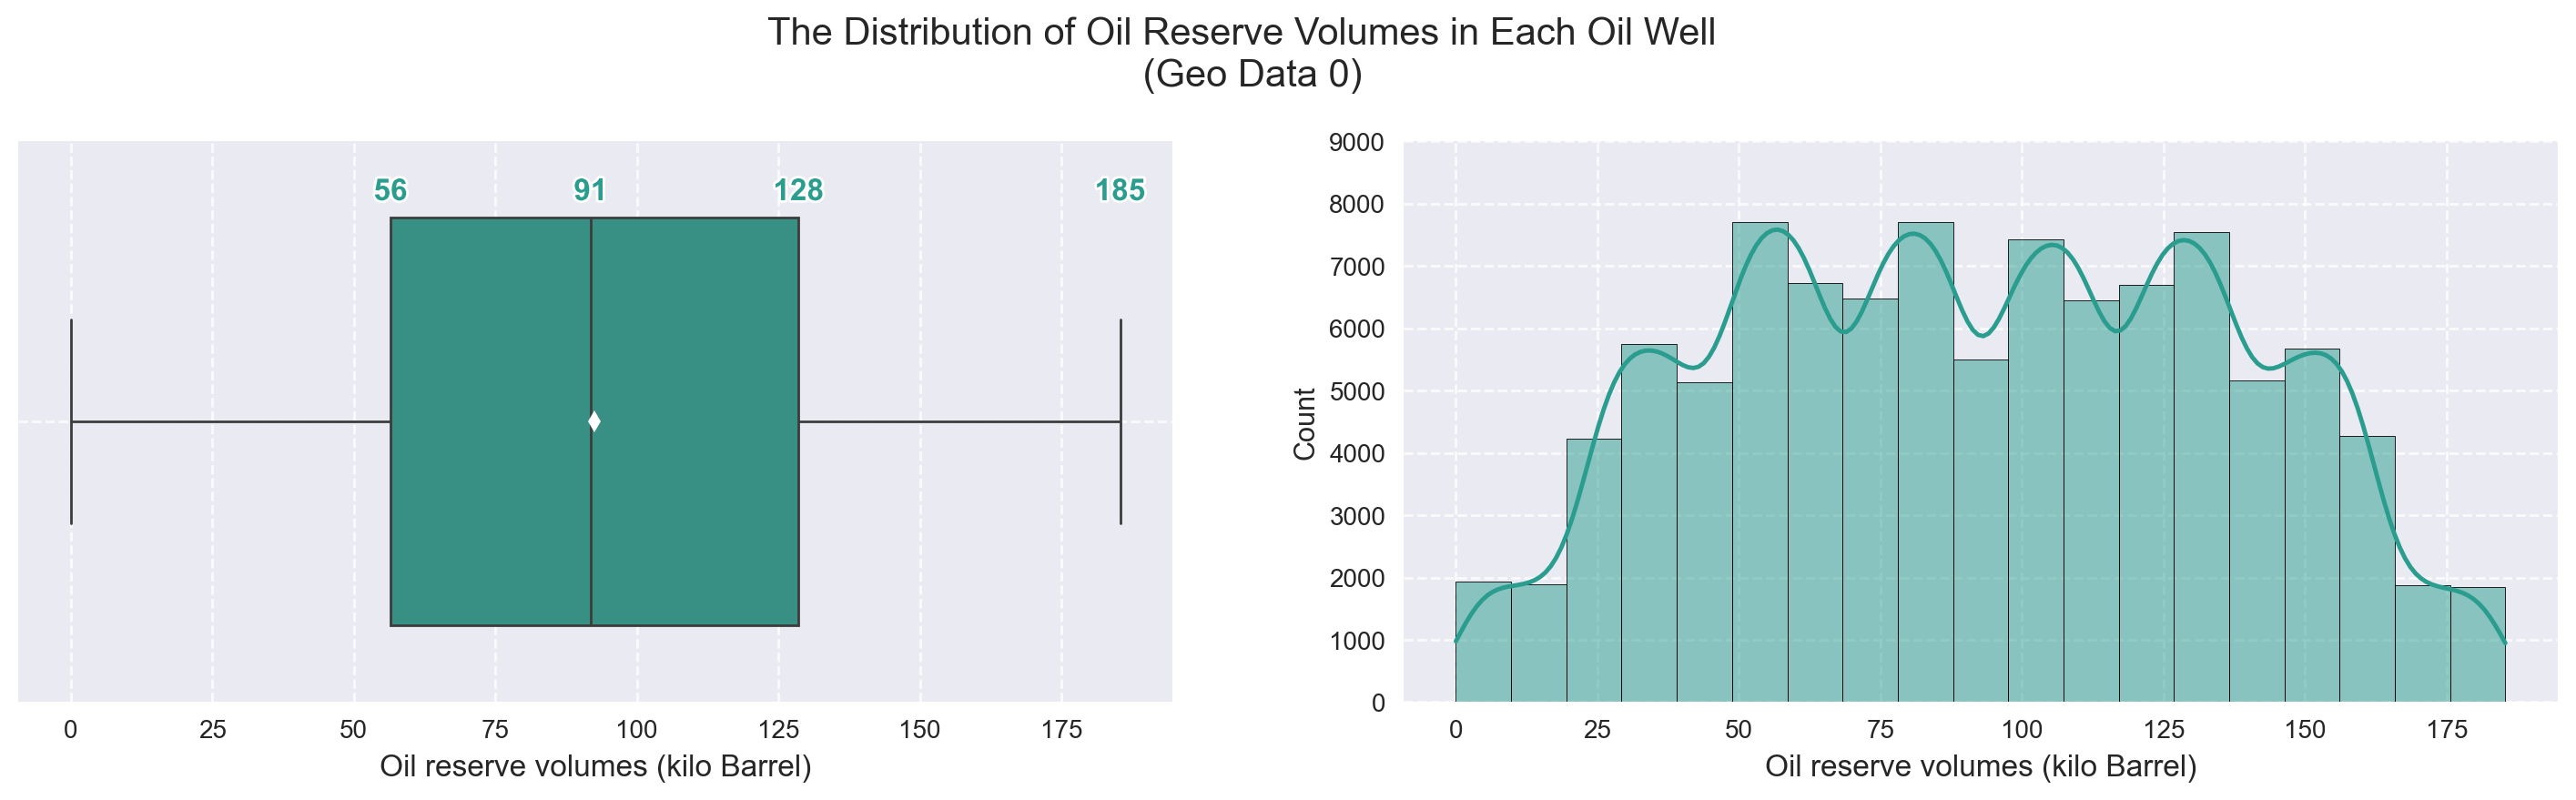

In [15]:
# Distribusi volume cadangan minyak di dalam sumur pada Geo Data 0
box_hist_plot(df=geo_0, column='product', width=10, size=(18,4), y_title=1.05,
              title="The Distribution of Oil Reserve Volumes in Each Oil Well \n (Geo Data 0)", 
              xlabel='Oil reserve volumes (kilo Barrel)', l_ylim=(0.55,-0.55), r_ylim=(0,9000))

<h3 style="font-weight:bold; font-family:Trebuchet MS">Findings & Insights</h3>
<div style="margin-left:1%; margin-top:1%; width:97%; text-align:justify">

* Rata-rata cadangan minyak pada sumur **Geo Data 0**  adalah 92.5 ribu barrel dengan standard deviasi sebesar 44.3 ribu barrel.
* Standard deviasi cadangan minyak yang hampir 50% nilai rata-rata menunjukkan data tersebar cukup luas.
* Distribusi cadangan minyak menunjukkan distribusi yang simetris dengan median dan rata-rata yang saling berhimpitan.
* Nilai rata-rata ataupun median cadangan minyak pada wilayah ini masih kurang dari volume minimum yang dibutuhkan agar perusahaan tidak mengalami kerugian, yaitu sebesar 111.1 ribu barel.

</div>

Berikut di bawah ini akan ditampilkan *scatter plot* beserta nilai korelasi pearson yang menerangkan hubungan setiap variabel di dalam dataset.

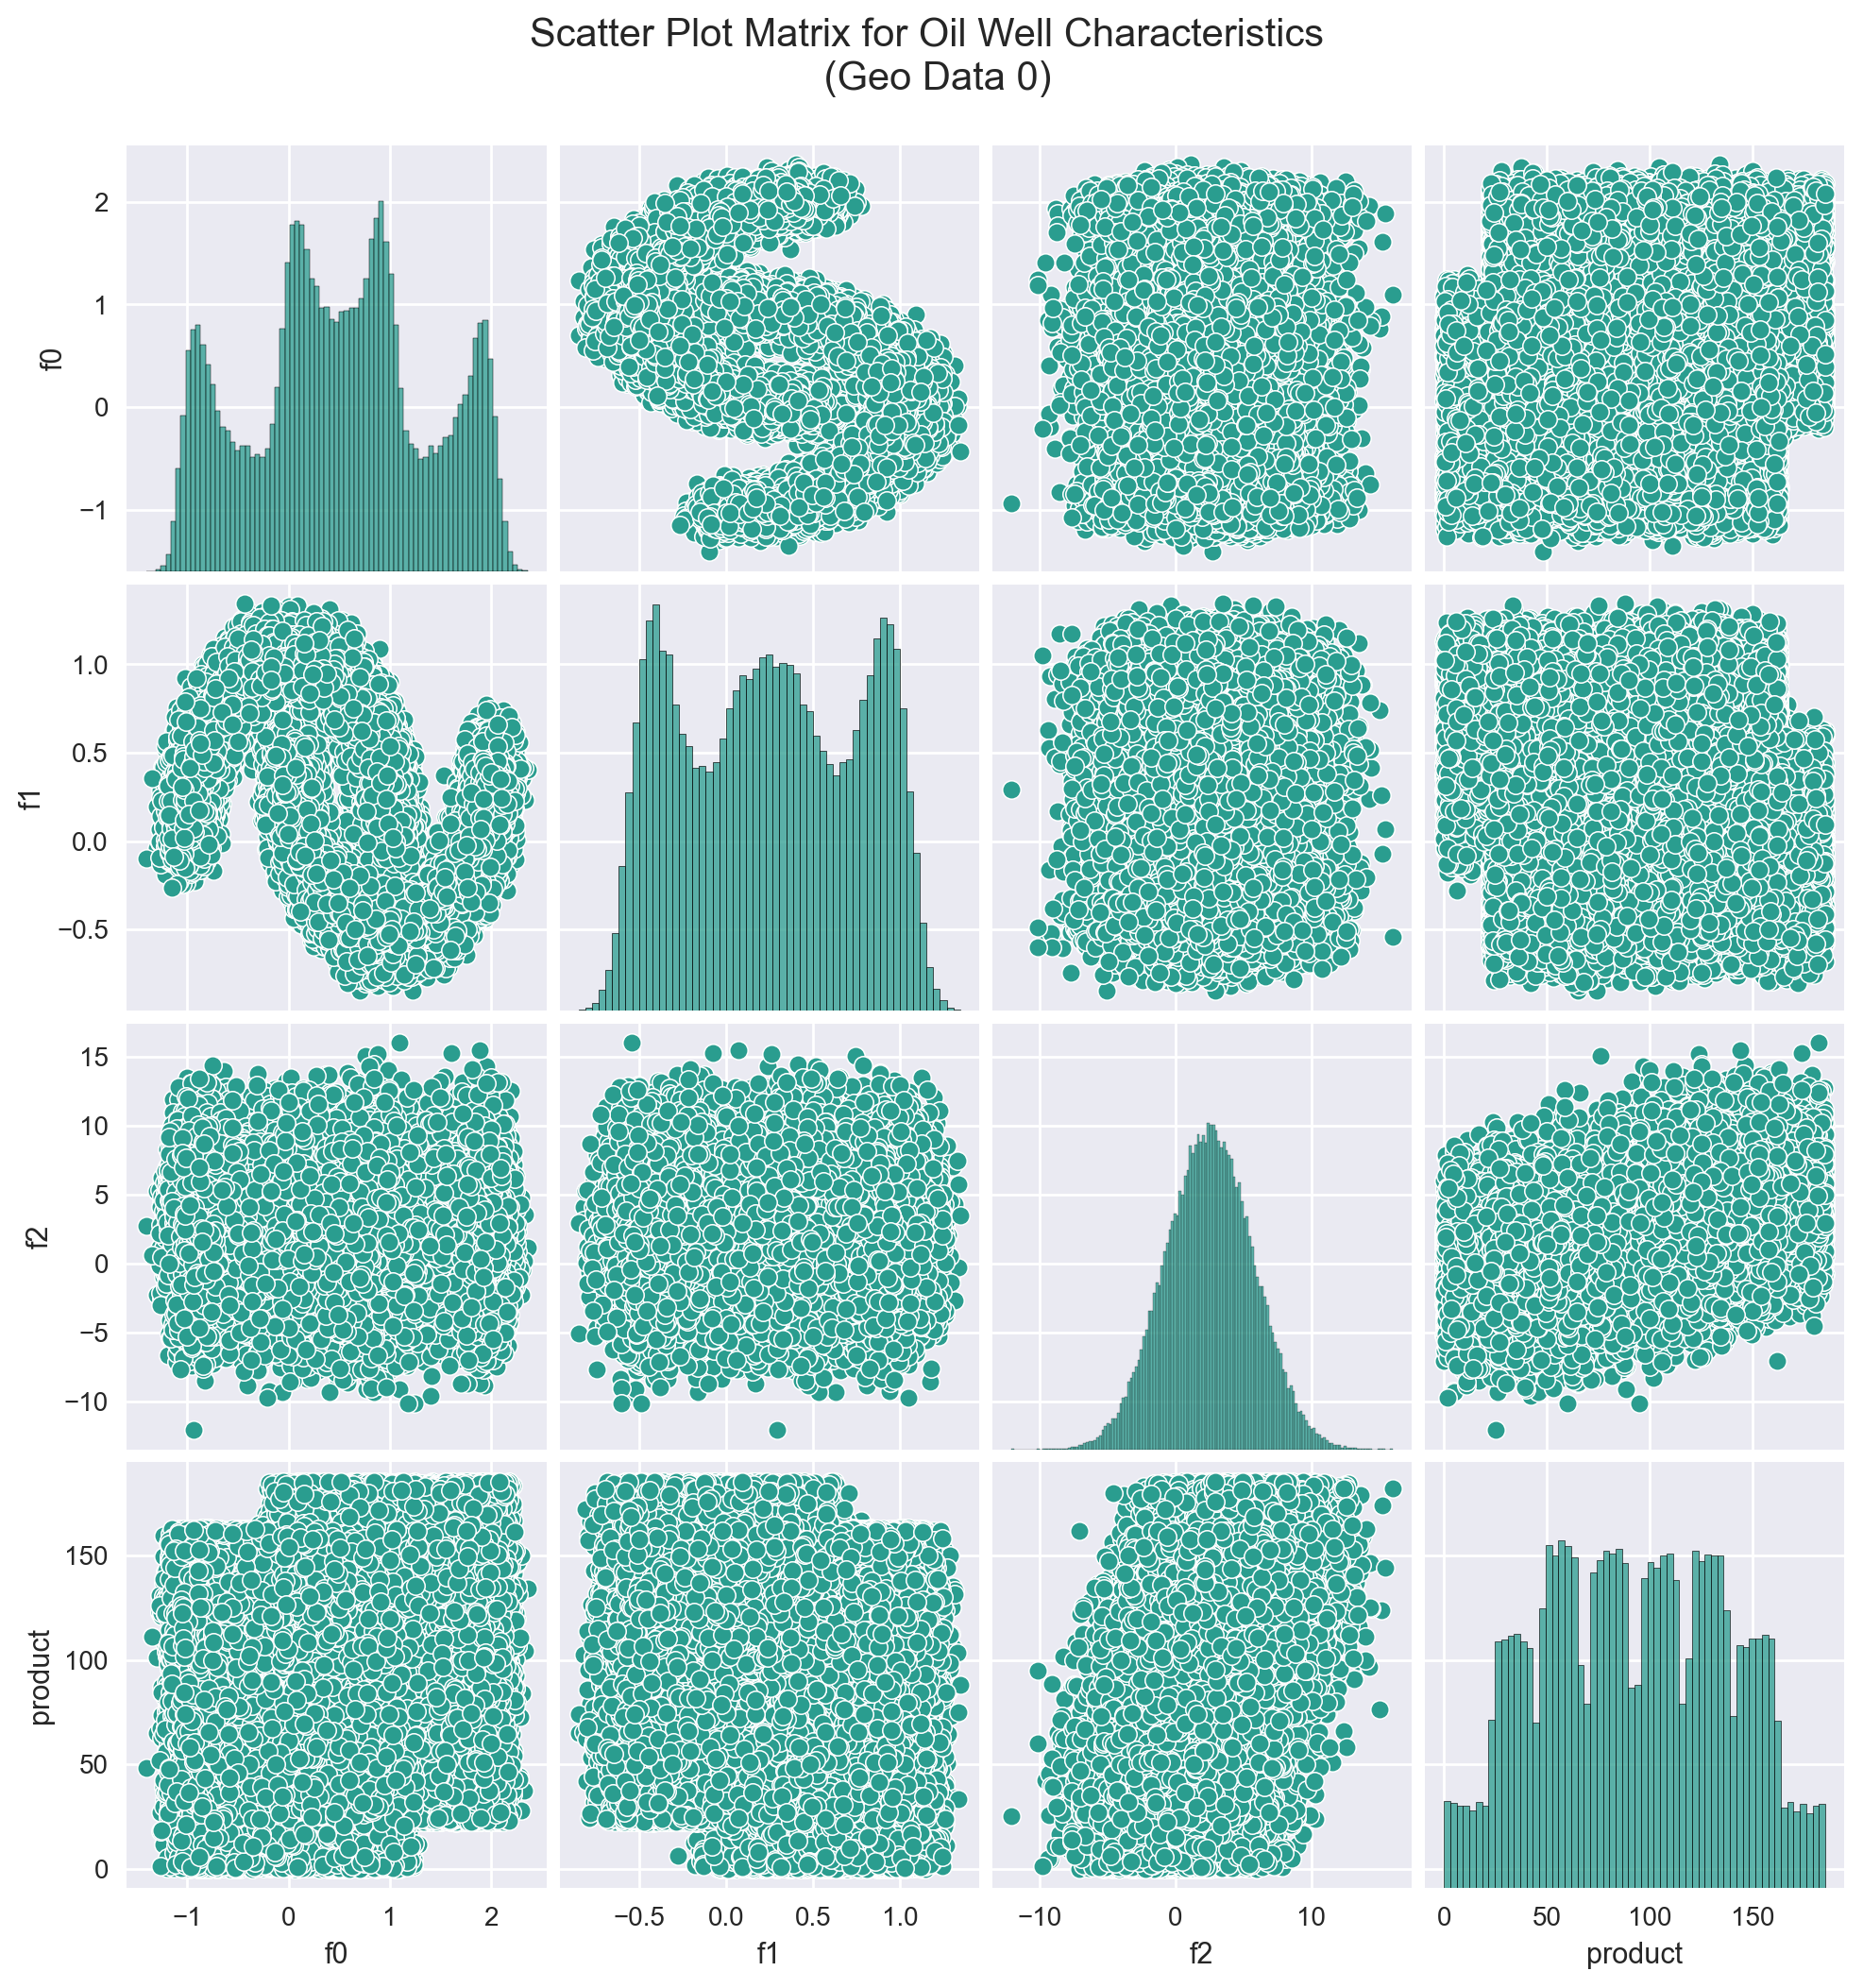

In [16]:
# matriks scatter plot untuk Geo Data 0
sns.pairplot(data=geo_0,
             plot_kws={'color':'#2A9D8F'}, 
             diag_kws={'color':'#2A9D8F'},
             grid_kws={"despine": False})

plt.suptitle("Scatter Plot Matrix for Oil Well Characteristics \n (Geo Data 0)", y=1.05, size=15)
plt.show()

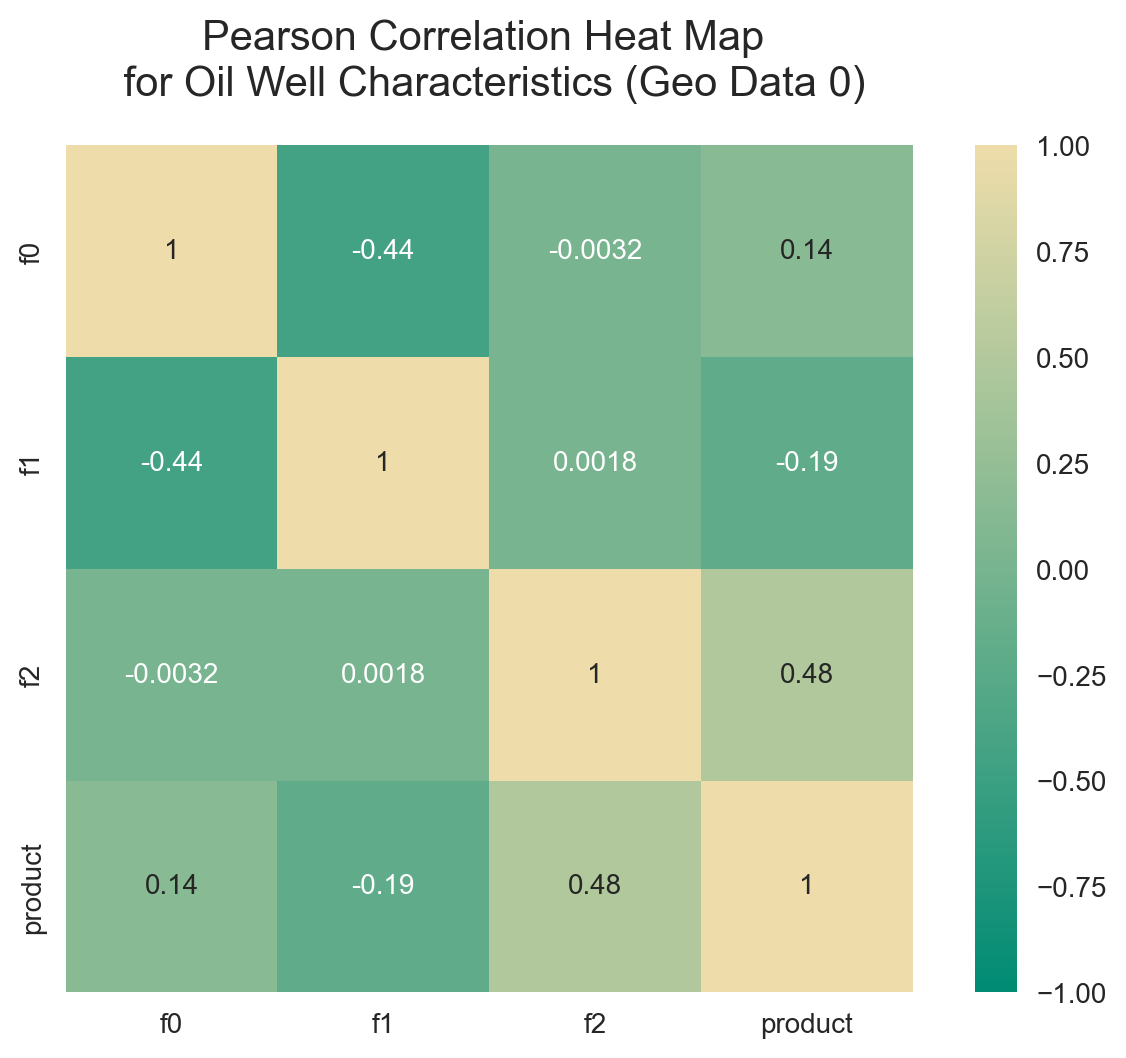

In [17]:
# matriks korelasi pearson untuk Geo Data 0
fig, ax1 = plt.subplots()
sns.heatmap(data=geo_0.corr(numeric_only=True),
            annot=True, square=True, vmax=1, vmin=-1, 
            cmap=sns.color_palette("blend:#008B74,#EDA", as_cmap=True))
plt.title("Pearson Correlation Heat Map \n for Oil Well Characteristics (Geo Data 0)", y=1.04, size=15)
plt.show()

<h3 style="font-weight:bold; font-family:Trebuchet MS">Findings & Insights</h3>
<div style="margin-left:1%; margin-top:1%; width:97%; text-align:justify">

* Pada *scatter plot* terlihat bahwa fitur `f2` menujukkan korelasi positif yang cukup kuat terhadap volume cadangan minyak dibandingkan fitur lainnya (`f0` dan `f1`)
* Berdasarkan korelasi pearson, korelasi antara fitur dan target pada dataset ini, yaitu:
    * `product` &ndash; `f0` : 0.14
    * `product` &ndash; `f1` : -0.19
    * `product` &ndash; `f2` : 0.48

</div>

## 2) Geo Data 1

Berikut di bawah ini ditampilkan deskripsi dataset **Geo Data 1** dan distribusi volume cadangan minyak di wilayah tersebut.

In [18]:
# menampilkan deskripsi dataset : Geo Data 1
print(f"{' Geo Data 1 ':=^60}\n")
geo_1.describe()

======================== Geo Data 1 ========================



f0            f1            f2       product
count  99992.000000  99992.000000  99992.000000  99992.000000
mean       1.141363     -4.796522      2.494511     68.824148
std        8.965805      5.119934      1.703587     45.944889
min      -31.609576    -26.358598     -0.018144      0.000000
25%       -6.298525     -8.267985      1.000021     26.953261
50%        1.153190     -4.813005      2.011475     57.085625
75%        8.620964     -1.332704      3.999904    107.813044
max       29.421755     18.734063      5.019721    137.945408

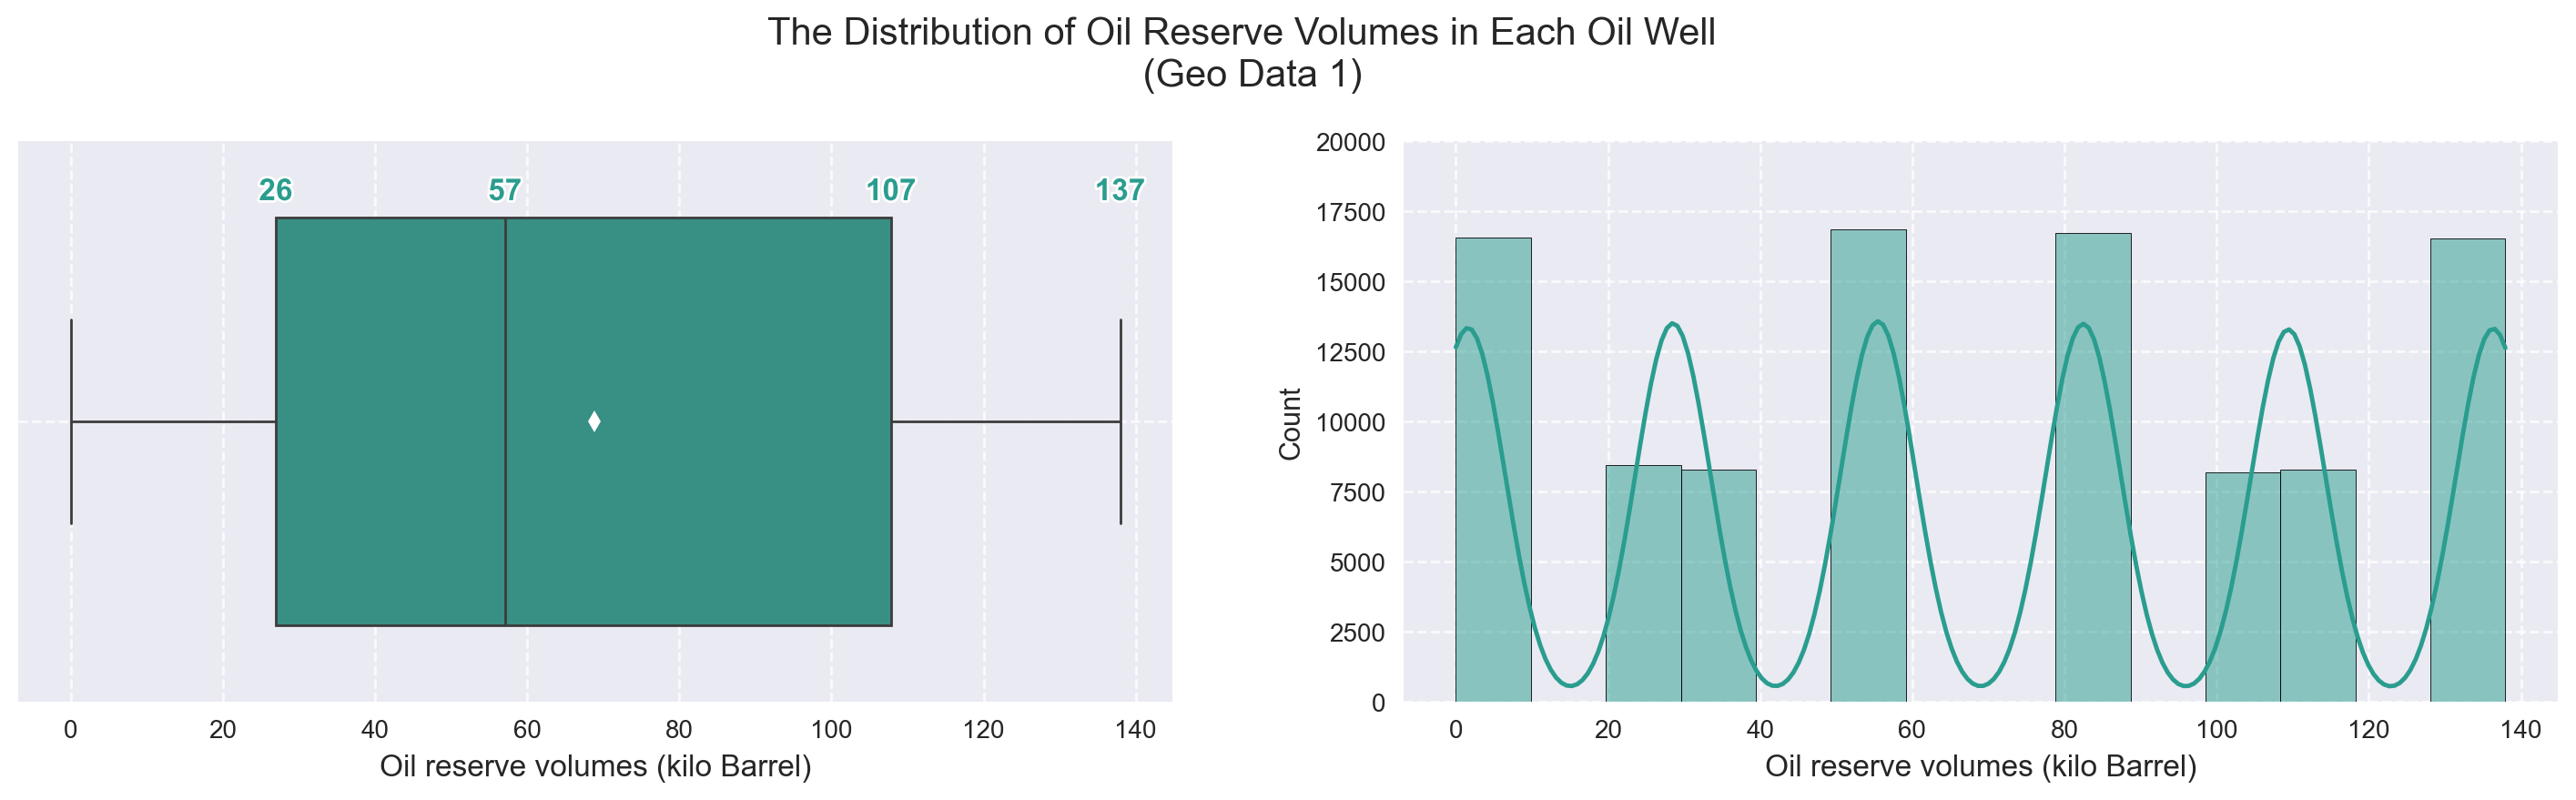

In [19]:
# Distribusi volume cadangan minyak di dalam sumur pada Geo Data 1
box_hist_plot(df=geo_1, column='product', width=10, size=(18,4), y_title=1.05,
              title="The Distribution of Oil Reserve Volumes in Each Oil Well \n (Geo Data 1)", 
              xlabel='Oil reserve volumes (kilo Barrel)', l_ylim=(0.55,-0.55), r_ylim=(0,20000))

<h3 style="font-weight:bold; font-family:Trebuchet MS">Findings & Insights</h3>
<div style="margin-left:1%; margin-top:1%; width:97%; text-align:justify">

* Rata-rata cadangan minyak pada sumur **Geo Data 1**  adalah 68.8 ribu barrel dengan standard deviasi sebesar 45.9 ribu barrel.
* Standard deviasi cadangan minyak yang lebih dari 50% nilai rata-rata menunjukkan data tersebar cukup luas.
* Nilai median yang lebih rendah dari pada rata-rata menunjukkan data cadangan minyak pada wilayah ini tidak terdistribusi simetris.
* Dari distribusi histogram, terlihat **data cadangan minyak tidak terdistribusi merata melainkan tersegmentasi pada nilai-nilai tertentu**.
* Nilai rata-rata ataupun median cadangan minyak pada wilayah ini masih kurang dari volume minimum yang dibutuhkan agar perusahaan tidak mengalami kerugian, yaitu sebesar 111.1 ribu barel.

</div>

Berikut di bawah ini akan ditampilkan *scatter plot* beserta nilai korelasi pearson yang menerangkan hubungan setiap variabel di dalam dataset.

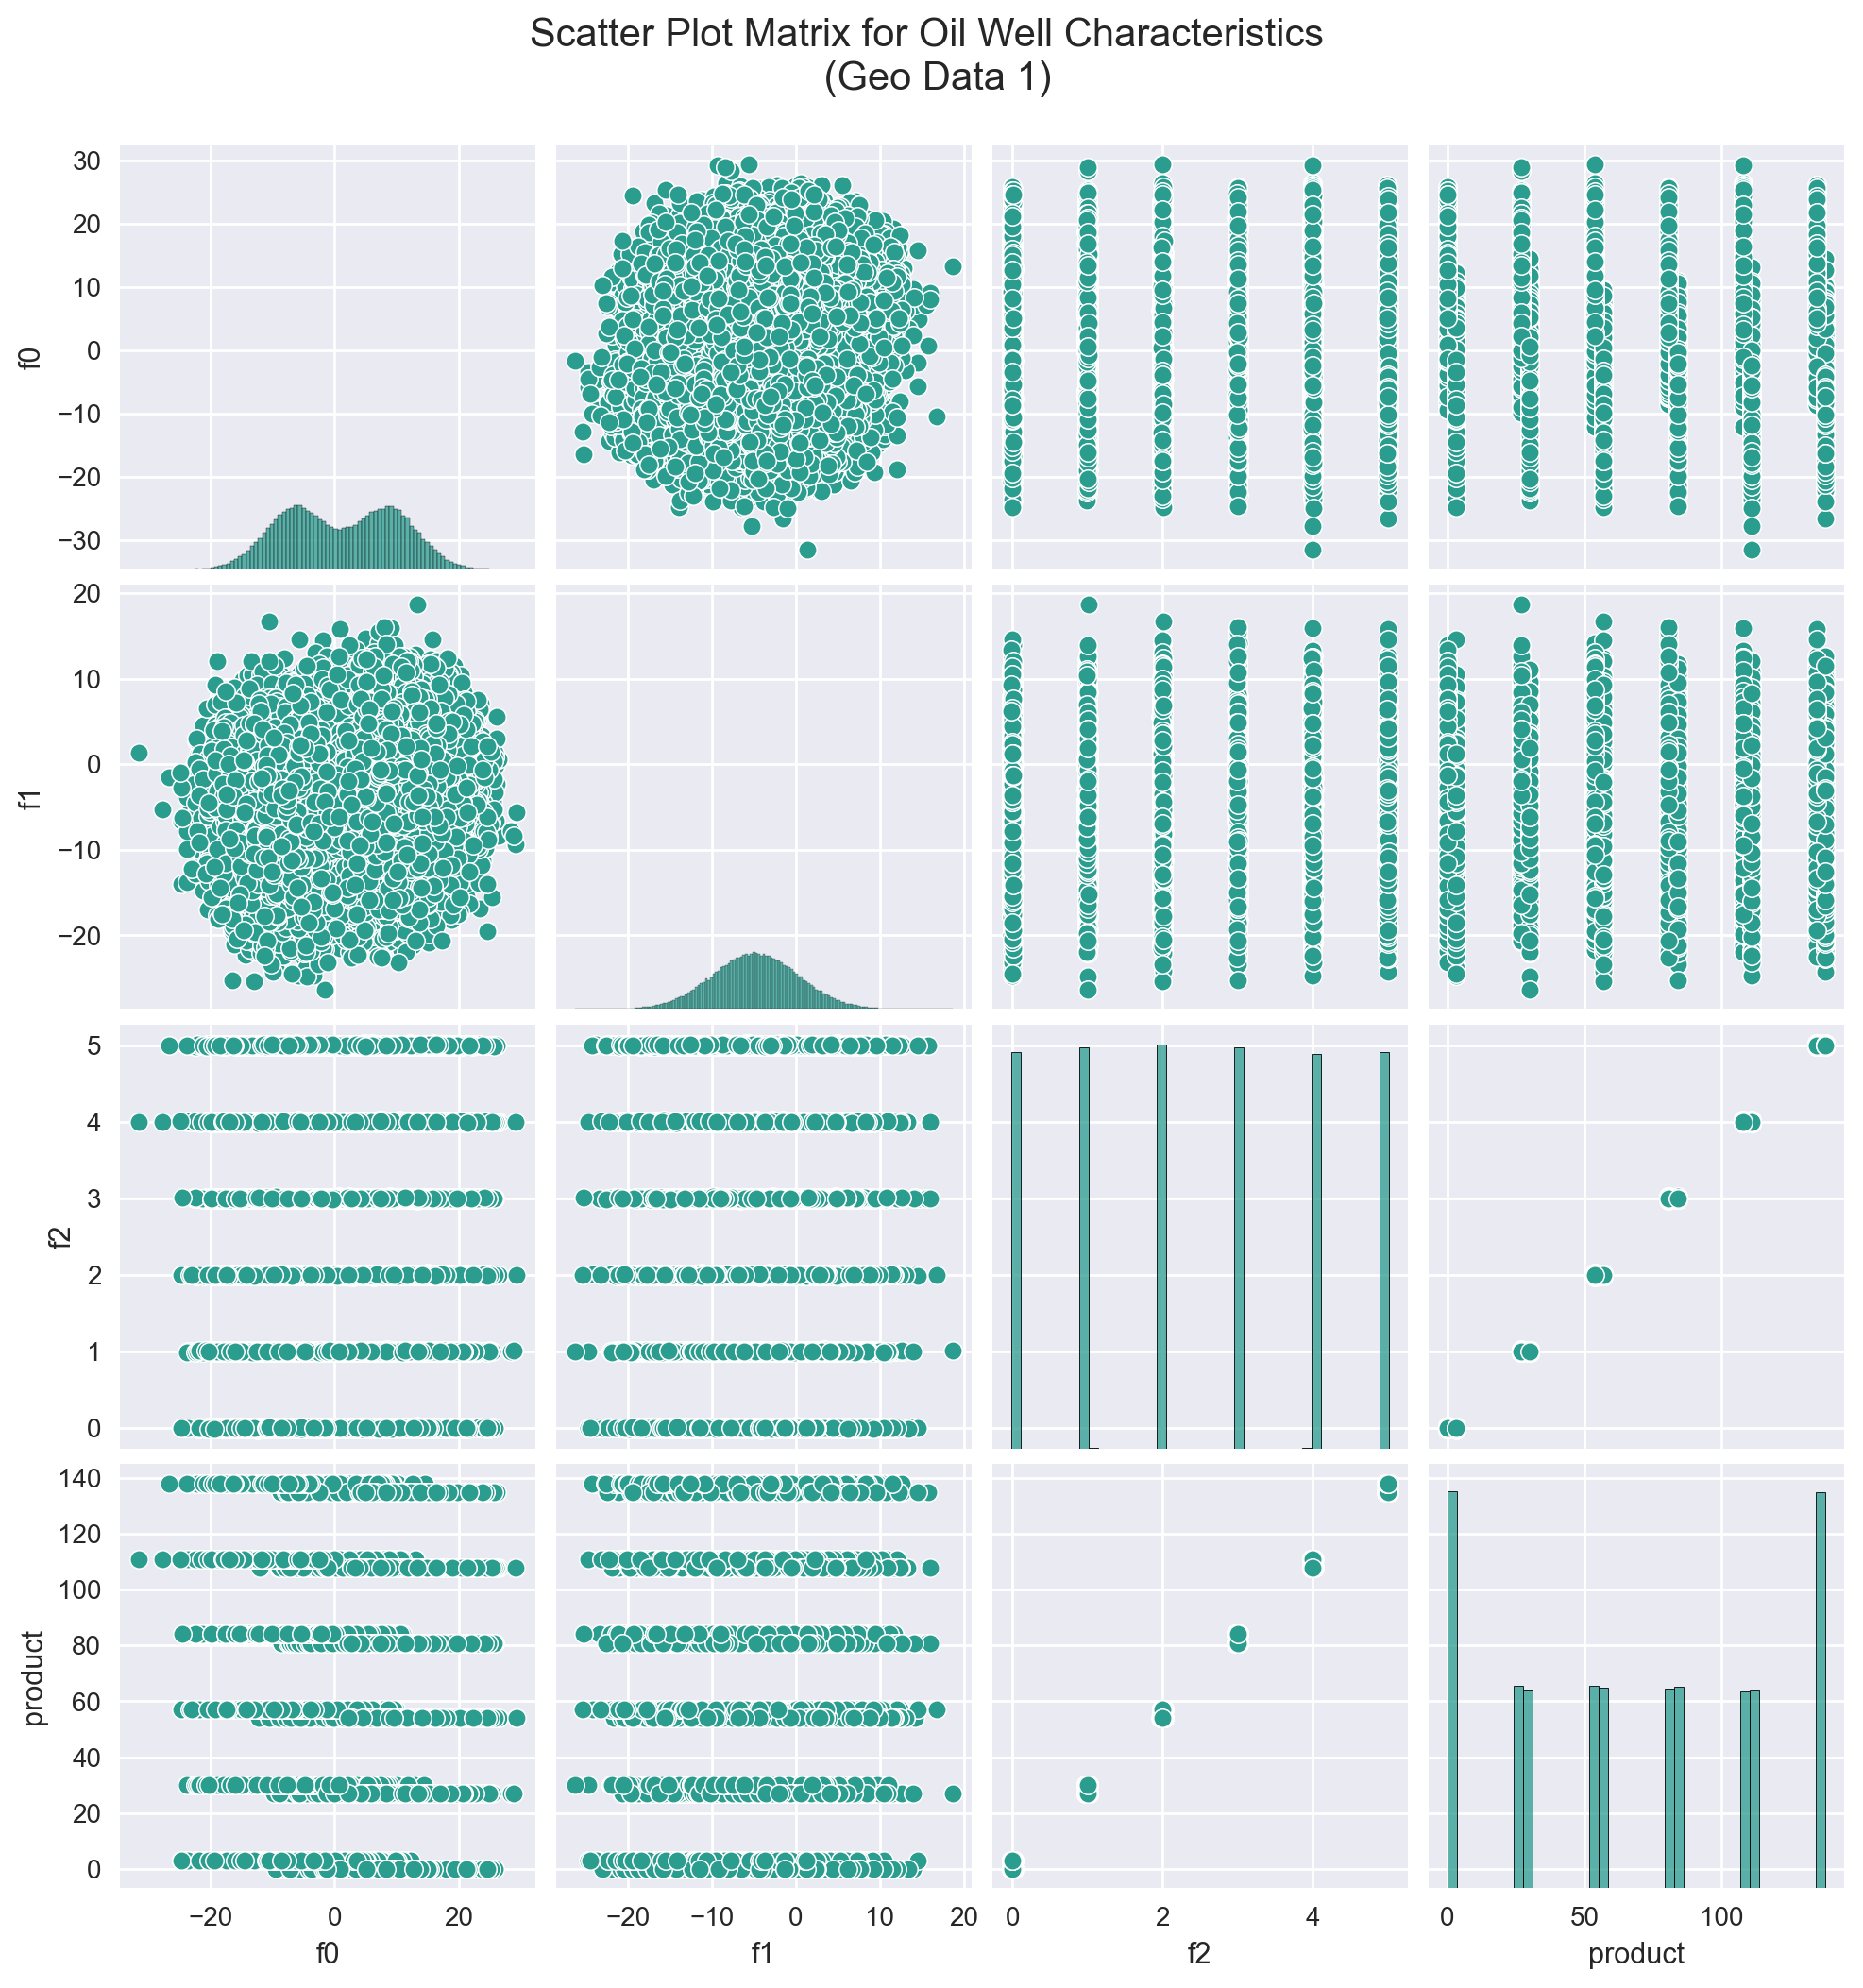

In [20]:
# matriks scatter plot untuk Geo Data 1
sns.pairplot(data=geo_1,
             plot_kws={'color':'#2A9D8F'}, 
             diag_kws={'color':'#2A9D8F'},
             grid_kws={"despine": False})

plt.suptitle("Scatter Plot Matrix for Oil Well Characteristics \n (Geo Data 1)", y=1.05, size=15)
plt.show()

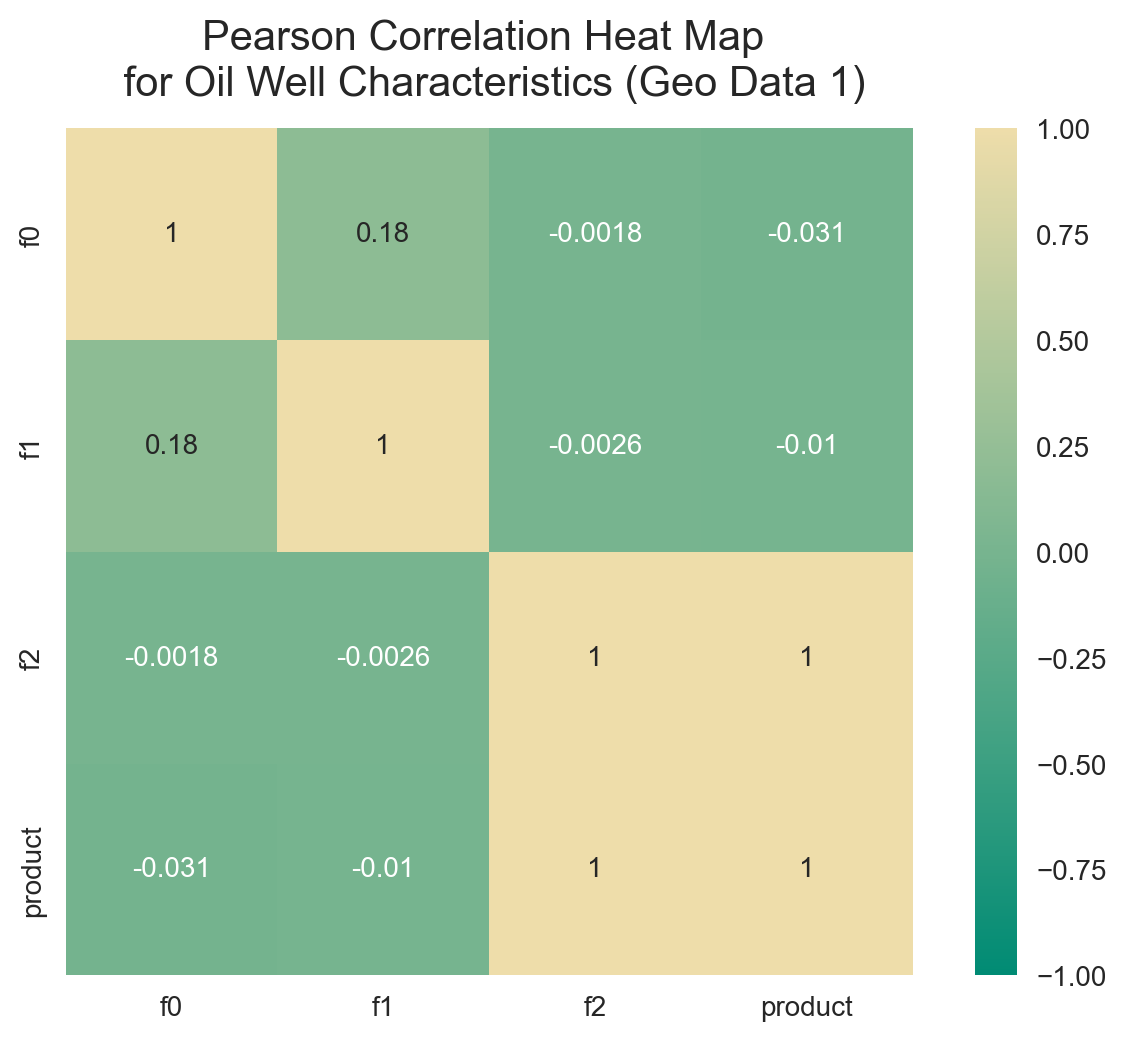

In [21]:
# matriks korelasi pearson untuk Geo Data 1
fig, ax1 = plt.subplots()
sns.heatmap(data=geo_1.corr(numeric_only=True),
            annot=True, square=True, vmax=1, vmin=-1, 
            cmap=sns.color_palette("blend:#008B74,#EDA", as_cmap=True))
plt.title("Pearson Correlation Heat Map \n for Oil Well Characteristics (Geo Data 1)", y=1.02, size=15)
plt.show()

<h3 style="font-weight:bold; font-family:Trebuchet MS">Findings & Insights</h3>
<div style="margin-left:1%; margin-top:1%; width:97%; text-align:justify">

* Pada *scatter plot* terlihat bahwa **fitur `f2` menujukkan korelasi positif yang sangat kuat terhadap volume cadangan minyak** dibandingkan fitur lainnya (`f0` dan `f1`)
* Dari *scatter plot* terlihat bahwa fitur `f0` dan `f1` tidak mempengaruhi besaran nilai volume cadangan minyak suatu sumur.
* Berdasarkan korelasi pearson, korelasi antara fitur dan target pada dataset ini, yaitu:
    * `product` &ndash; `f0` : -0.031
    * `product` &ndash; `f1` : -0.01
    * `product` &ndash; `f2` : 1
* Korelasi yang sangat kuat antara fitur `f2` terhadap volume cadangan minyak suatu sumur menunjukkan bahwa cukup dengan menggunakan fitur `f2`, kita dapat mengetahui besaran cadangan minyak suatu sumur di wilayah **Geo Data 1**.

</div>

## 3) Geo Data 2

Berikut di bawah ini ditampilkan deskripsi dataset **Geo Data 2** dan distribusi volume cadangan minyak di wilayah tersebut.

In [22]:
# menampilkan deskripsi dataset : Geo Data 2
print(f"{' Geo Data 2 ':=^60}\n")
geo_2.describe()

======================== Geo Data 2 ========================



f0            f1            f2       product
count  99992.000000  99992.000000  99992.000000  99992.000000
mean       0.001975     -0.002113      2.495088     94.998767
std        1.732061      1.730404      3.473491     44.747763
min       -8.760004     -7.084020    -11.970335      0.000000
25%       -1.162328     -1.174820      0.130269     59.450441
50%        0.009411     -0.009580      2.484236     94.925026
75%        1.158442      1.163592      4.858662    130.585544
max        7.238262      7.844801     16.739402    190.029838

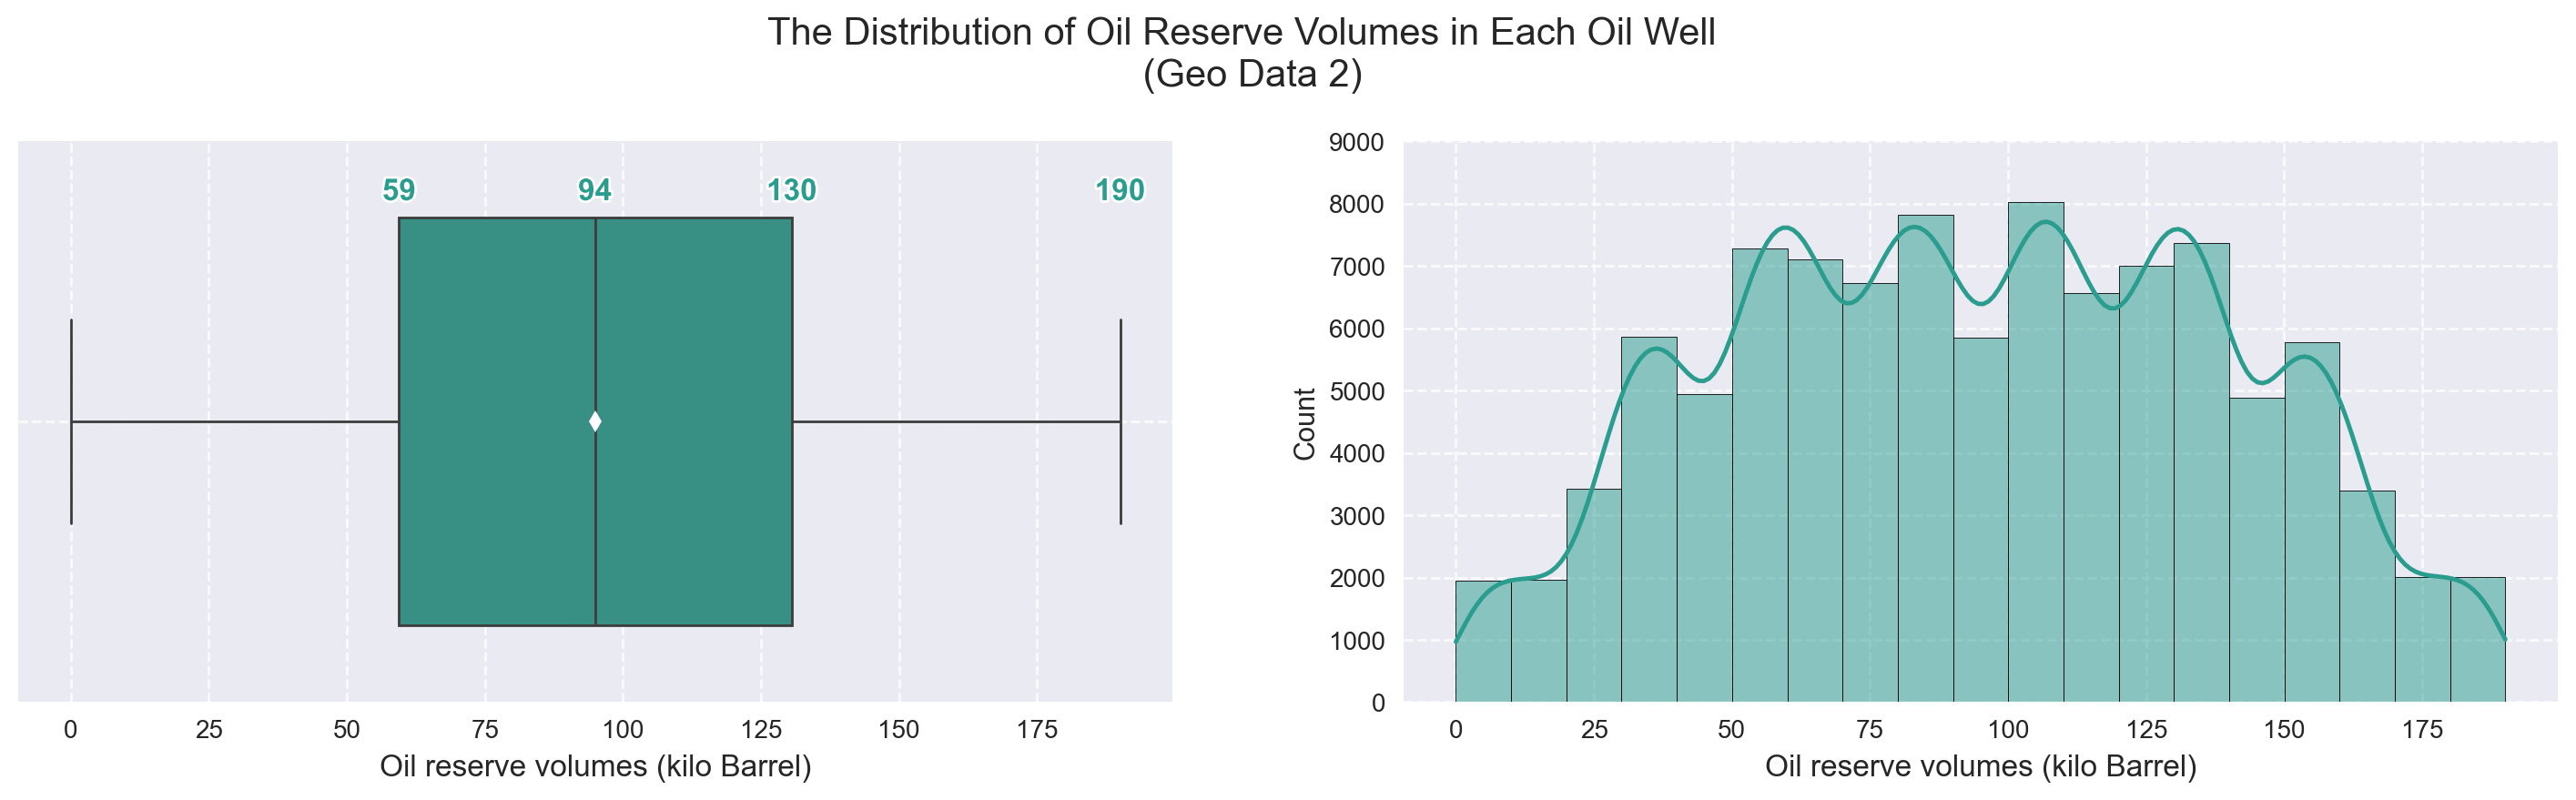

In [23]:
# Distribusi volume cadangan minyak di dalam sumur pada Geo Data 2
box_hist_plot(df=geo_2, column='product', width=10, size=(18,4), y_title=1.05,
              title="The Distribution of Oil Reserve Volumes in Each Oil Well \n (Geo Data 2)", 
              xlabel='Oil reserve volumes (kilo Barrel)', l_ylim=(0.55,-0.55), r_ylim=(0,9000))

<h3 style="font-weight:bold; font-family:Trebuchet MS">Findings & Insights</h3>
<div style="margin-left:1%; margin-top:1%; width:97%; text-align:justify">

* Rata-rata cadangan minyak pada sumur **Geo Data 2**  adalah 95 ribu barrel dengan standard deviasi sebesar 44.7 ribu barrel.
* Standard deviasi cadangan minyak yang hampir 50% nilai rata-rata menunjukkan data tersebar cukup luas.
* Distribusi cadangan minyak menunjukkan distribusi yang simetris dengan median dan rata-rata yang saling berhimpitan.
* Nilai rata-rata ataupun median cadangan minyak pada wilayah ini masih kurang dari volume minimum yang dibutuhkan agar perusahaan tidak mengalami kerugian, yaitu sebesar 111.1 ribu barel.

</div>

Berikut di bawah ini akan ditampilkan *scatter plot* beserta nilai korelasi pearson yang menerangkan hubungan setiap variabel di dalam dataset.

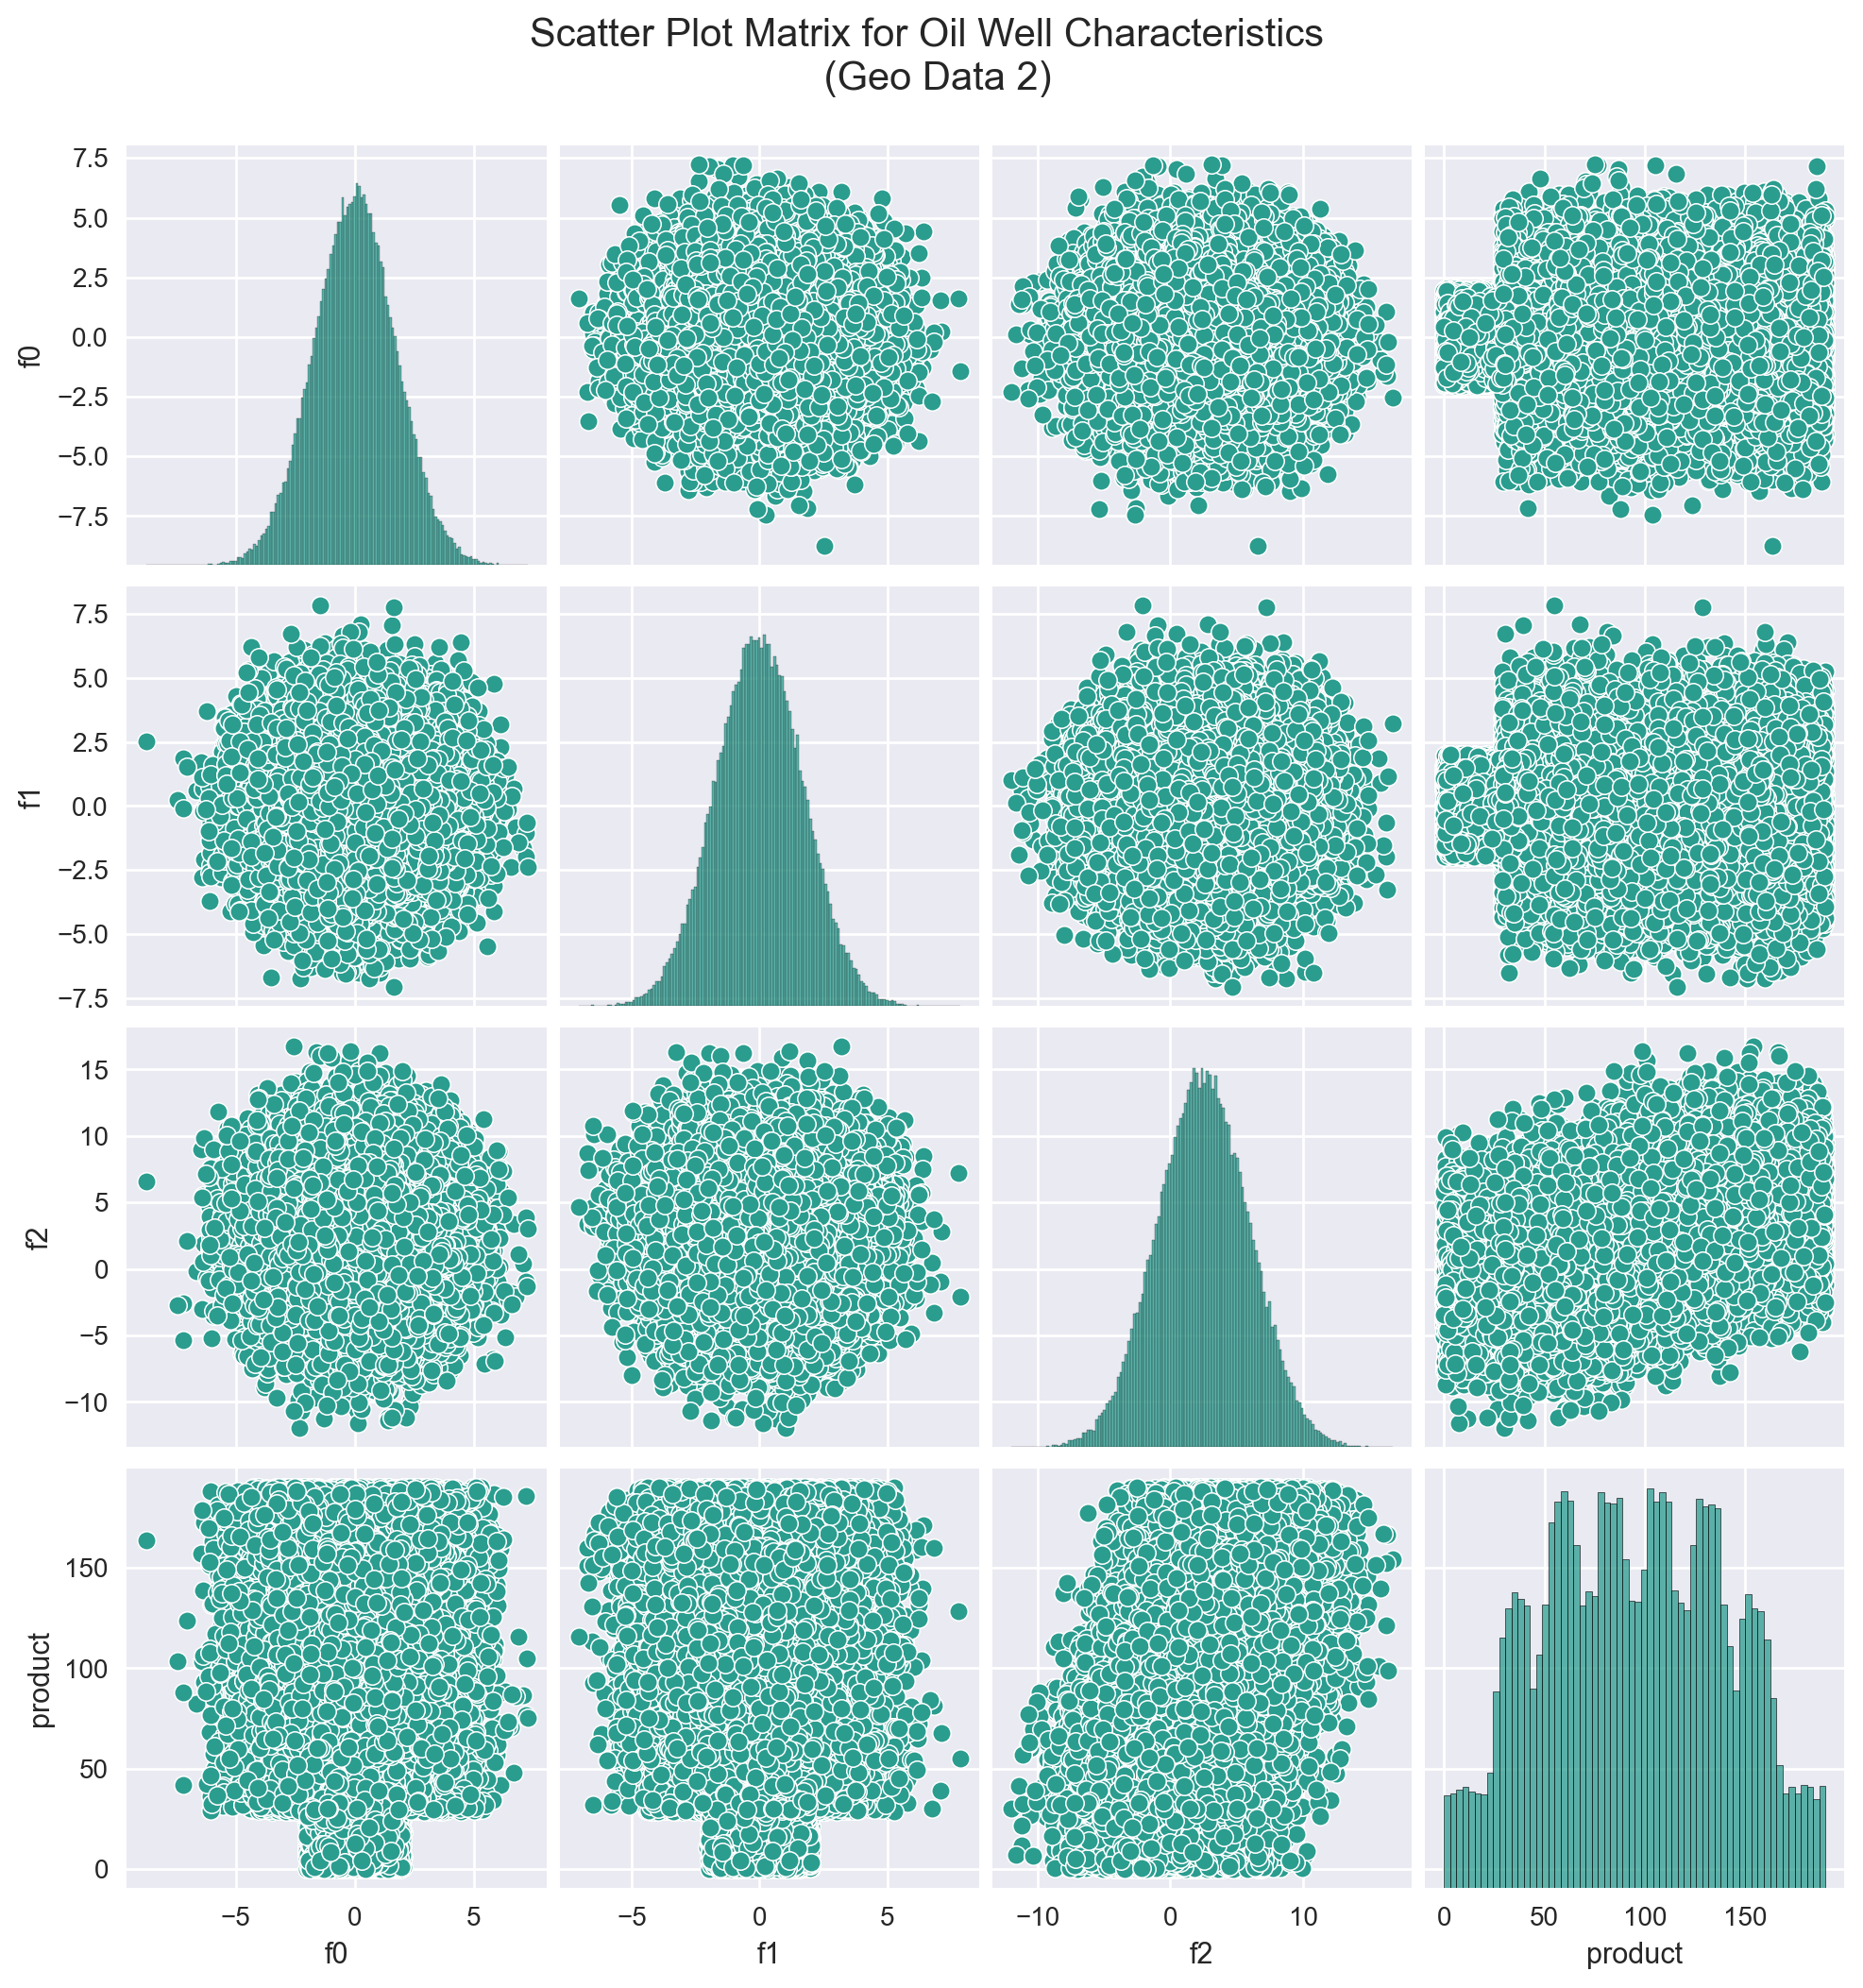

In [24]:
# matriks scatter plot untuk Geo Data 2
sns.pairplot(data=geo_2,
             plot_kws={'color':'#2A9D8F'}, 
             diag_kws={'color':'#2A9D8F'},
             grid_kws={"despine": False})

plt.suptitle("Scatter Plot Matrix for Oil Well Characteristics \n (Geo Data 2)", y=1.05, size=15)
plt.show()

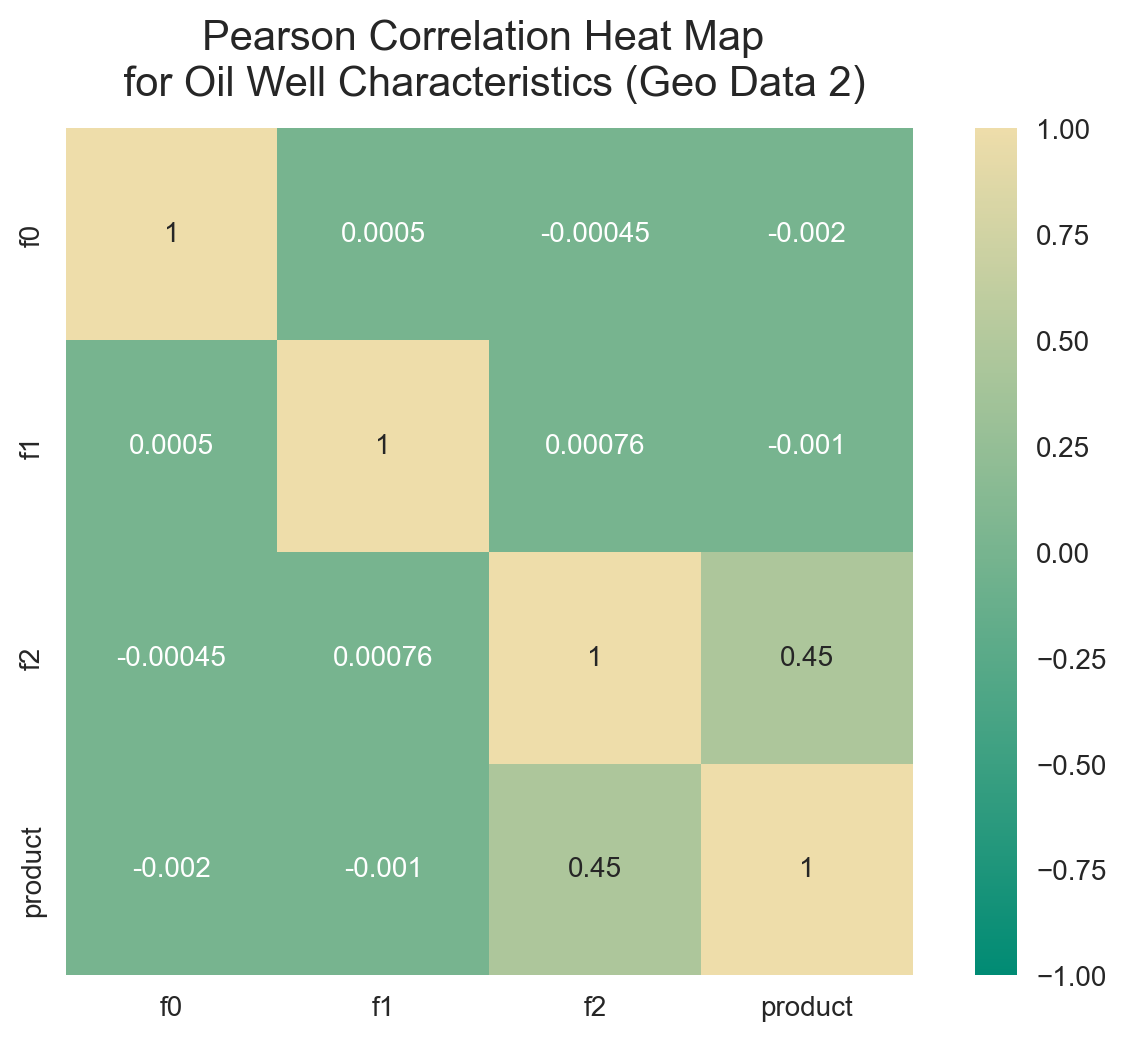

In [25]:
# matriks korelasi pearson untuk Geo Data 2
fig, ax1 = plt.subplots()
sns.heatmap(data=geo_2.corr(numeric_only=True),
            annot=True, square=True, vmax=1, vmin=-1, 
            cmap=sns.color_palette("blend:#008B74,#EDA", as_cmap=True))
plt.title("Pearson Correlation Heat Map \n for Oil Well Characteristics (Geo Data 2)", y=1.02, size=15)
plt.show()

<h3 style="font-weight:bold; font-family:Trebuchet MS">Findings & Insights</h3>
<div style="margin-left:1%; margin-top:1%; width:97%; text-align:justify">

* Pada *scatter plot* terlihat bahwa fitur `f2` menujukkan korelasi positif yang cukup kuat terhadap volume cadangan minyak dibandingkan fitur lainnya (`f0` dan `f1`)
* Berdasarkan korelasi pearson, korelasi antara fitur dan target pada dataset ini, yaitu:
    * `product` &ndash; `f0` : -0.002
    * `product` &ndash; `f1` : -0.001
    * `product` &ndash; `f2` : 0.45
* Nilai korelasi yang sangat kecil pada fitur `f0` dan `f1`, menunjukkan bahwa satu-satunya fitur yang mempengaruhi besaran nilai volume cadangan minyak suatu sumur di wilayah ini adalah fitur `f2`.

</div>

## 4) Kesimpulan

Dari hasil analisa data eksploratif (EDA) yang telah dilakukan, diperoleh kesimpulan sebagai berikut.
* Seluruh nilai rata-rata volume cadangan minyak suatu sumur pada ketiga wilayah menunjukkan nilai yang kurang dari volume minimum rata-rata agar perusahaan **OilyGiant** tidak mengalami kerugian, yaitu sebesar 111.1 ribu barel.
* Wilayah 2 merupakan wilayah dengan rata-rata volume cadangan minyak terbesar dibandingkan 2 wilayah lainnya. Adapun wilayah 1 merupakan wilayah dengan rata-rata volume cadangan minyak paling kecil.
* Berikut adalah nilai rata-rata dan standard deviasi volume cadangan minyak pada ketiga wilayah.
    * **Wilayah 0 :** $\mu$ = 92.5 ribu barrel ; $\sigma$ = 44.3 ribu barrel.
    * **Wilayah 1 :** $\mu$ = 68.8 ribu barrel ; $\sigma$ = 45.9 ribu barrel.
    * **Wilayah 2 :** $\mu$ = 95.0 ribu barrel ; $\sigma$ = 44.7 ribu barrel.
* Pada seluruh wilayah, nilai volume cadangan minyak pada suatu titik sumur cenderung ditentukan oleh fitur `f2` karena memiliki korelasi yang lebih kuat dari pada fitur lainnya.

# **F. Membangun Model *Machine-learning***

## 1) *Features Engineering*

### **Membagi Dataset**

Dataset akan dibagi menjadi 2 bagian, yaitu **training dataset** dan **validation dataset** dengan proporsi sebesar 75% dan 25% secara berturut-turut.

Sebelum melakukan pembagian, kolom `'id'` pada dataset harus dikeluarkan karena tidak diperlukan untuk pelatihan model *machine learning*.

In [26]:
# membuang kolom 'id' pada ketiga dataset
geo_all = [
    geo_0.drop("id", axis='columns'),
    geo_1.drop("id", axis='columns'),
    geo_2.drop("id", axis='columns')
]

# menampilkan ukuran dataset
print(f"Ukuran dataset Geo Data 0 : {geo_all[0].shape}")
print(f"Ukuran dataset Geo Data 1 : {geo_all[1].shape}")
print(f"Ukuran dataset Geo Data 2 : {geo_all[2].shape}")

Ukuran dataset Geo Data 0 : (99980, 4)
Ukuran dataset Geo Data 1 : (99992, 4)
Ukuran dataset Geo Data 2 : (99992, 4)


Berikutnya, fitur dan target pada setiap dataset akan dipisah dalam variabel yang berbeda.

In [27]:
# memisahkan antara features dan target
features_all = []
target_all = []
for region in range(len(geo_all)):
    features_all.append(geo_all[region].drop("product", axis='columns'))
    target_all.append(geo_all[region]["product"])

# menampilkan ukuran features dan target
for region in range(len(geo_all)):
    print(f"\n========== Data Region {region} ==========")
    print(f"Ukuran tabel features{features_all[region].shape}")
    print(f"Ukuran tabel target{target_all[region].shape}")


========== Data Region 0 ==========
Ukuran tabel features(99980, 3)
Ukuran tabel target(99980,)

========== Data Region 1 ==========
Ukuran tabel features(99992, 3)
Ukuran tabel target(99992,)

========== Data Region 2 ==========
Ukuran tabel features(99992, 3)
Ukuran tabel target(99992,)


Berikutnya, akan dilakukan pembagian dataset menjadi 2 bagian, yaitu **Training Dataset** dan **Validation Dataset** dengan proporsi sebesar 75% dan 25% secara berturut-turut.

In [28]:
# membagi dataset menjadi 2 bagian
train_features_all = [None, None, None]
train_target_all = [None, None, None]
val_features_all = [None, None, None]
val_target_all = [None, None, None]

for region in range(len(geo_all)):
    train_features_all[region], val_features_all[region], train_target_all[region], val_target_all[region] = train_test_split(features_all[region], target_all[region], test_size=0.25, random_state=12345)

# menampilkan ukuran setiap dataset
for region in range(len(geo_all)):
    print(f"\n==================== Data Region {region} ====================")
    print(f"Training dataset   -- features: {train_features_all[region].shape}    target: {train_target_all[region].shape}")
    print(f"Validation dataset -- features: {val_features_all[region].shape}    target: {val_target_all[region].shape}")


==================== Data Region 0 ====================
Training dataset   -- features: (74985, 3)    target: (74985,)
Validation dataset -- features: (24995, 3)    target: (24995,)

==================== Data Region 1 ====================
Training dataset   -- features: (74994, 3)    target: (74994,)
Validation dataset -- features: (24998, 3)    target: (24998,)

==================== Data Region 2 ====================
Training dataset   -- features: (74994, 3)    target: (74994,)
Validation dataset -- features: (24998, 3)    target: (24998,)


Dataset telah dipisah antara *features* dan *target* serta telah dibagi antara **Training Dataset** dan **Validation Dataset** untuk seluruh data sumur minyak pada ketiga wilayah. Oleh karena itu, dataset siap untuk lanjut pada proses berikutnya.

### ***Feature Scaling***

Nilai antar *feature* cukup beragam dan memiliki *range* yang beragam pula. Oleh karena itu perlu dilakukan *scaling* pada setiap fitur numerik agar setiap fitur memiliki peran yang seimbang pada permodelan *machine learning*.

Proses *fitting* skala akan berpatokan pada data **training dataset**.

In [29]:
# melakukan features scaling
numeric = ['f0', 'f1', 'f2']
## list objek scaler untuk setiap wilayah
scaler = [StandardScaler(), StandardScaler(), StandardScaler()]

## melakukan fitting skala
for region in range(len(geo_all)):
    scaler[region].fit(train_features_all[region])

## melakukan transformasi
for region in range(len(geo_all)):
    train_features_all[region][numeric] = scaler[region].transform(train_features_all[region][numeric])
    val_features_all[region][numeric] = scaler[region].transform(val_features_all[region][numeric])

## 2) *Model Training*

Berikut di bawah ini merupakan *function* yang dapat melakukan *model training* serta mengeluarkan hasil evaluasi terhadap hasil prediksi.

In [30]:
def train_eval_model(y_train, x_train, y_test, x_test, info):
    model = LinearRegression()
    model.fit(x_train, y_train)

    # prediksi data dan evaluasi
    predictions = model.predict(x_test)
    rmse = mean_squared_error(y_test, predictions)**0.5
    r2 = r2_score(y_test, predictions)

    # tabel perbandingan antara prediksi dan aktual
    comparison = pd.DataFrame(data={'actual':y_test, 'prediction':predictions})

    title = f" Evaluasi Model {info} "
    print(f"\n{title:=^120}")
    print(f"RMSE Test : {rmse:.2f} Ribu Barel/sumur")
    print(f"R2 Test   : {r2:.2%}")
    print(120*'-')
    print(f"Rata-rata cadangan minyak (aktual)   : {y_test.mean():.2f} Ribu Barrel/sumur")
    print(f"Rata-rata cadangan minyak (prediksi) : {predictions.mean():.2f} Ribu Barrel/sumur")
    
    return model, comparison

In [31]:
# melakukan model training dan evaluasi hasil prediksi
model_0, comp_0 = train_eval_model(y_train=train_target_all[0], x_train=train_features_all[0],
                                   y_test=val_target_all[0], x_test=val_features_all[0], info='Geo Data 0')

model_1, comp_1 = train_eval_model(y_train=train_target_all[1], x_train=train_features_all[1],
                                   y_test=val_target_all[1], x_test=val_features_all[1], info='Geo Data 1')

model_2, comp_2 = train_eval_model(y_train=train_target_all[2], x_train=train_features_all[2],
                                   y_test=val_target_all[2], x_test=val_features_all[2], info='Geo Data 2')


============================================== Evaluasi Model Geo Data 0 ===============================================
RMSE Test : 37.72 Ribu Barel/sumur
R2 Test   : 27.67%
------------------------------------------------------------------------------------------------------------------------
Rata-rata cadangan minyak (aktual)   : 92.39 Ribu Barrel/sumur
Rata-rata cadangan minyak (prediksi) : 92.42 Ribu Barrel/sumur

============================================== Evaluasi Model Geo Data 1 ===============================================
RMSE Test : 0.89 Ribu Barel/sumur
R2 Test   : 99.96%
------------------------------------------------------------------------------------------------------------------------
Rata-rata cadangan minyak (aktual)   : 68.98 Ribu Barrel/sumur
Rata-rata cadangan minyak (prediksi) : 68.98 Ribu Barrel/sumur

============================================== Evaluasi Model Geo Data 2 ===============================================
RMSE Test : 39.98 Ribu Barel/sumu

<h3 style="font-weight:bold; font-family:Trebuchet MS">Findings & Insights</h3>
<div style="margin-left:1%; margin-top:1%; width:97%; text-align:justify">

* Meskipun rata-rata cadangan minyak (aktual) pada **Geo Data 1** sangat jauh dibandingkan volume cadangan minimum yang dibutuhkan perusahaan agar tidak rugi, yaitu 111.1 ribu barrel, tetapi ia **memiliki model yang dapat memprediksi dengan sangat akurat**.
* Dari hasil evaluasi ditunjukkan bahwa model pada **Geo Data 1** memberikan hasil paling akurat dengan RMSE sebesar 0.89 ribu barrel serta koefisien determinasi sebesar 99.96%.
* Pada **Geo Data 0** dan **Geo Data 2**, nilai error yang dihasilkan (RMSE) cukup besar yaitu bernilai sekitar &pm;40% nilai rata-rata volume aktual. Skor koefisien determinasi yang dihasilkan juga cukup rendah tetapi masih lebih baik dari pada model yang  memprediksi menggunakan nilai rata-rata.

</div>

# **G. Valuasi Bisnis**

## 1) Persiapan Perhitungan Laba

Pada bagian pendahuluan, telah dijelaskan bahwa **OilyGiant** menganggarkan modal sebesar 100 juta USD untuk membangun 200 titik sumur baru dengan terlebih dahulu melakukan studi pada 500 titik sumur. Adapun harga untuk 1000 barel minyak mentah yaitu sebesar 4500 USD.

In [32]:
# kondisi bisnis
CAPITAL = 100_000_000 # total modal yang akan disediakan (satuan USD) untuk 200 titik proyek eksplorasi
SAMPLE_POINT = 500 # jumlah titik sampel untuk studi wilayah
FINAL_POINT = 200 # jumlah titik yang akan direalisasikan
REVENUE = 4500 # jumlah pendapatan (satuan USD) untuk setiap 1000 barrel minyak

Berikut adalah sejumlah perhitungan turunan dari variabel-variabel di atas.

In [33]:
# biaya investasi rata-rata untuk sebuah sumur
cost_per_point = CAPITAL/FINAL_POINT # satuan USD
# total volume minyak minimum pada suatu wilayah agar BEP
min_product = CAPITAL/REVENUE # satuan ribu barel
# volume minyak rata-rata minimum di setiap sumur agar BEP
min_product_perPoint = min_product/FINAL_POINT # satuan ribu barel

print(f"Biaya investasi rata-rata untuk setiap sumur      : {cost_per_point} USD/sumur")
print(f"Total cadangan minyak minimum pada suatu wilayah  : {min_product:.2f} ribu barel/wilayah")
print(f"Cadangan minyak rata-rata minimum di setiap sumur : {min_product_perPoint:.2f} ribu barel/sumur")

Biaya investasi rata-rata untuk setiap sumur      : 500000.0 USD/sumur
Total cadangan minyak minimum pada suatu wilayah  : 22222.22 ribu barel/wilayah
Cadangan minyak rata-rata minimum di setiap sumur : 111.11 ribu barel/sumur


Pada bagian sebelumnya, yaitu **Analisa Data Eksploratif**, diketahui bahwa rata-rata cadangan minyak untuk sebuah sumur di wilayah 0, wilayah 1, dan wilayah 2 secara berurutan yaitu 92.5 ribu barel, 68.8 ribu barel dan 95 ribu barel. Adapun dari perhitungan yang telah dilakukan, rata-rata cadangan minyak untuk setiap sumur setidaknya senilai 111.11 ribu barel agar perusahaan **OilyGiant** tidak mengalami kerugian.

Oleh karena itu, hal di atas tersebut menunjukkan terdapatnya peluang resiko bahwa perusahaan **OilyGiant** akan mengalami kerugian ketika melakukan studi pada 500 titik yang kemudian dilanjutkan dengan pengambilan 200 titik terbaik. Perlu dilakukan pengujian seberapa besar tingkat keyakinan bahwa 200 titik tersebut tidak akan memberikan kerugian pada perusahaan.

## 2) Perhitungan Laba 200 Sumur Terpilih (*Best Scenario*)

Pada bagian sebelumnya telah diketahui bahwa rata-rata cadangan minyak pada ketiga wilayah bernilai lebih kecil dari pada rata-rata cadangan minyak minimum agar perusahaan **OilyGiant** tidak mengalami kerugian. Akan tetapi, apakah 200 sumur terbaik versi prediksi yang dilakukan oleh model akan memberikan keuntungan? Dan seberapa besar keuntungan tersebut?

Berikut di bawah ini adalah *best scenario* untuk memperoleh 200 titik terbaik dari setiap wilayah (asumsi tidak melakukan *sampling* tetapi mengambil seluruh data populasi).

* **Fungsi untuk mengambil 200 titik sumur terbaik berdasarkan hasil prediksi, kemudian dilakukan penjumlahan laba setiap titik**

In [34]:
# membuat fungsi perhitungan akumulasi laba 200 titik terbaik
def best200_profit(data:pd.DataFrame):
    # mengambil 200 titik terbaik
    data = data.sort_values('prediction', ascending=False).head(200)
    
    # perhitungan profit berdasarkan data aktual
    profit = data['actual'].sum()*REVENUE - CAPITAL
    
    return profit

In [35]:
# menghitung total profit untuk best scenario
print(f"{' Best Scenario ':=^80}")
print(f"Total profit 200 titik terbaik di wilayah 0 : {best200_profit(comp_0):.2f} USD")
print(f"Total profit 200 titik terbaik di wilayah 1 : {best200_profit(comp_1):.2f} USD")
print(f"Total profit 200 titik terbaik di wilayah 2 : {best200_profit(comp_2):.2f} USD")

================================ Best Scenario =================================
Total profit 200 titik terbaik di wilayah 0 : 31360260.57 USD
Total profit 200 titik terbaik di wilayah 1 : 24150866.97 USD
Total profit 200 titik terbaik di wilayah 2 : 24659457.92 USD


Dari hasil di atas terlihat bahwa terdapat peluang untuk perusahaan **OilyGiant** untuk memperoleh keuntungan sehingga dapat mengembalikan modal yang telah dikeluarkan. Oleh karena itu, ketiga wilayah layak untuk diteliti lebih lanjut agar dapat dihitung 95% distribusi profit terbesar yang dihasilkan oleh pemilihan 200 titik terbaik dari pengambilan 500 sampel secara acak pada ketiga wilayah.

## 3) Perhitungan Laba dan Resiko Bisnis 200 Sumur Terpilih

Pada bagian ini, akan dilakukan studi dengan cara pengambilan sampel secara acak pada masing-masing wilayah sebanyak 500 titik sumur. Dari 500 titik tersebut akan diambil 200 titik terbaik berdasarkan hasil prediksi model.

Berikut di bawah ini, akan dibangun sebuah *function* yang akan melakukan proses *sampling* (ukuran 500 sample) sebanyak 1000 kali percobaan disertai pengembalian untuk setiap iterasi. Output dari *function* ini adalah distribusi jumlah profit 200 titik terbaik untuk setiap iterasi.

In [36]:
def bootstraping_best200(data:pd.DataFrame, sample_size:int=500, iteration:int=1000):
    state = np.random.RandomState(12345)
    profit_dist = []
    for i in range(iteration):
        sampling = data.sample(sample_size, random_state=state)
        profit = best200_profit(sampling)
        profit_dist.append(profit)
        
    profit_dist = pd.Series(profit_dist)
    return profit_dist

Berikut di bawah ini, akan dibangun sebuah *function* yang berfungsi untuk menghitung 95% distribusi data profit tertinggi dari hasil *bootstraping* pada *function* di atas, menghitung rata-rata profit, dan menghitung probabilitas resiko kerugian yang dihasilkan.

In [37]:
def profit_eval(data:pd.DataFrame, wilayah):
    profit_dist = bootstraping_best200(data=data, sample_size=500, iteration=1000)
    profit_dist = profit_dist.sort_values()
    min_profit = profit_dist.quantile(0.05)
    max_profit = profit_dist.quantile(1)
    mean = profit_dist.mean()
    risk_prob = (profit_dist<0).mean()
    
    title = f" Evaluasi Profit 200 Titik Terbaik di Wilayah {wilayah} "
    print(f"\n{title:=^80}")
    print(f"Range profit (95% CI) : ({min_profit:.2f} USD , {max_profit:.2f} USD)")
    print(f"Rata-rata profit      : {mean:.2f} USD")
    print(f"Resiko kerugian       : {risk_prob:.2%} \n")
    return profit_dist, risk_prob
    

Berikut di bawah ini merupakan hasil evaluasi profit dari 200 titik terbaik setelah dilakukan pengambilan 500 sampel, untuk masing-masing wilayah.


================ Evaluasi Profit 200 Titik Terbaik di Wilayah 0 ================
Range profit (95% CI) : (104309.75 USD , 11895421.46 USD)
Rata-rata profit      : 4252654.13 USD
Resiko kerugian       : 4.40% 


================ Evaluasi Profit 200 Titik Terbaik di Wilayah 1 ================
Range profit (95% CI) : (1337740.86 USD , 11540472.79 USD)
Rata-rata profit      : 4677351.29 USD
Resiko kerugian       : 0.60% 


================ Evaluasi Profit 200 Titik Terbaik di Wilayah 2 ================
Range profit (95% CI) : (-902743.62 USD , 12641924.89 USD)
Rata-rata profit      : 3377842.86 USD
Resiko kerugian       : 9.00% 



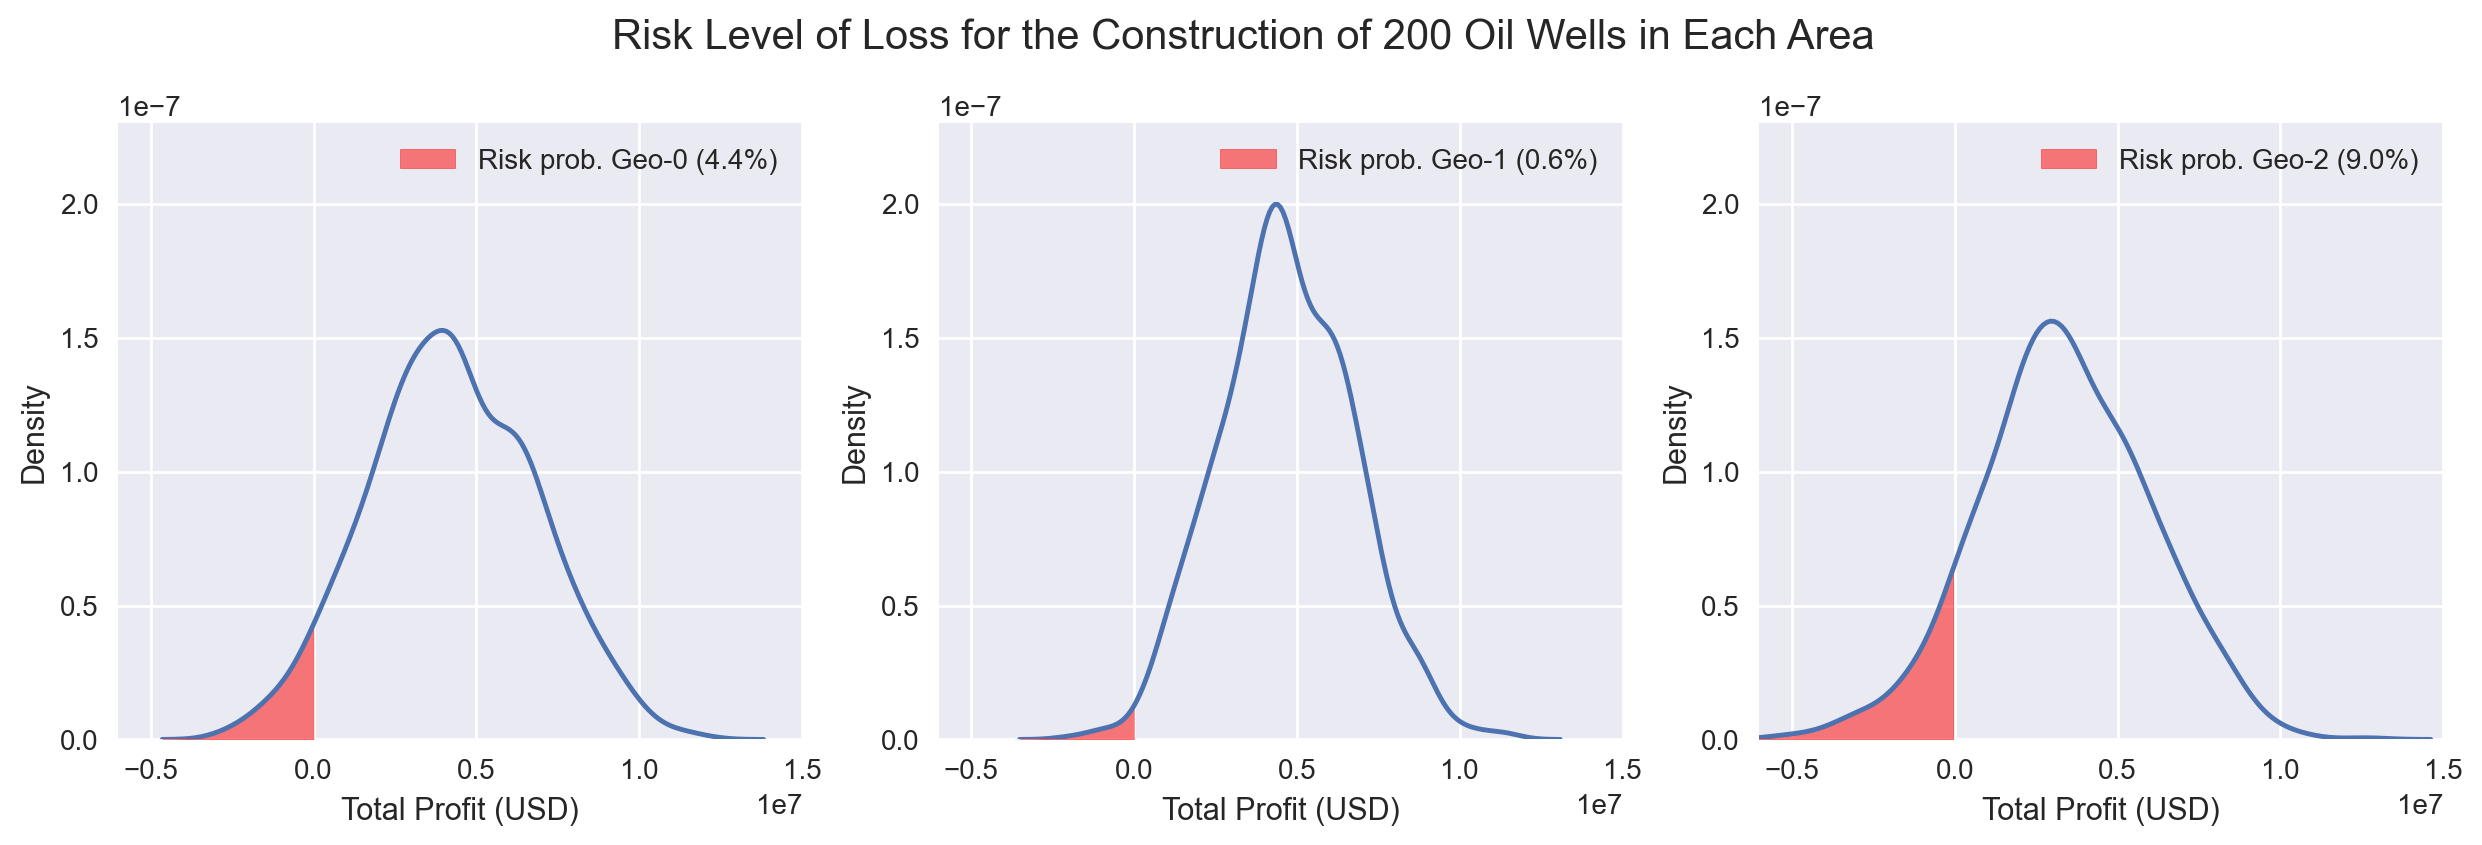

In [38]:
# evaluasi profit
profit_0, risk_0 = profit_eval(data=comp_0, wilayah=0)
profit_1, risk_1 = profit_eval(data=comp_1, wilayah=1)
profit_2, risk_2 = profit_eval(data=comp_2, wilayah=2)

# visualisasi
fig, ax = plt.subplots(ncols=3, figsize=(15,4))
plt.suptitle("Risk Level of Loss for the Construction of 200 Oil Wells in Each Area", size=15, y=1.01)
for i,j in enumerate([(profit_0, risk_0), (profit_1, risk_1), (profit_2, risk_2)]):
    sns.kdeplot(j[0], ax=ax[i])
    risk_id = np.argwhere(ax[i].get_lines()[0].get_data()[0]<0).reshape(-1)
    ax[i].fill_between(ax[i].get_lines()[0].get_data()[0][risk_id], 
                       ax[i].get_lines()[0].get_data()[1][risk_id], 
                       alpha=0.5, color='red', label=f"Risk prob. Geo-{i} ({j[1]:.1%})")
    ax[i].set_xlim(-0.6e7, 1.5e7)
    ax[i].set_ylim(0, 2.3e-7)
    ax[i].set_xlabel("Total Profit (USD)")
    ax[i].legend()
fig.savefig("../assets/Risk Level of Loss for the Construction of 200 Oil Wells in Each Area.png",
            bbox_inches='tight', dpi=300)

<h3 style="font-weight:bold; font-family:Trebuchet MS">Findings</h3>
<div style="margin-left:1%; margin-top:1%; width:97%; text-align:justify">

Dari hasil evaluasi profit di atas, diperoleh informasi sebagai berikut.
* **Hanya wilayah 1 yang memiliki resiko kerugian kurang dari 2.5%**.
* Dengan tingkat keyakinan 95%, sumur di wilayah 0 dan 1 akan menghasilkan keuntungan untuk perusahaan **OilyGiant**.
* Rata-rata profit yang diperoleh dari pengambilan 200 titik terbaik dari pengambilan 500 sampel dari yang terbesar hingga terkecil :
    * **Wilayah 1 :** 4.677.351,29 USD
    * **Wilayah 0 :** 4.252.654,13 USD
    * **Wilayah 2 :** 3.377.842,86 USD  

</div>

<h3 style="font-weight:bold; font-family:Trebuchet MS">Insights</h3>
<div style="margin-left:1%; margin-top:1%; width:97%; text-align:justify">

* Pada *best scenario*, wilayah 1 merupakan wilayah yang menghasilkan profit paling rendah, tetapi pada kasus pengambilan 500 sampel acak dan memilih 200 terbaik, **wilayah 1 merupakan yang terbaik**.
* Penyebab dari hasil yang baik untuk wilayah 1 disebabkan oleh akurasi model pada wilayah ini dapat meprediksi dengan sangat akurat.
* Tingkat akurasi model dan jumlah pengambilan sampel studi akan sangat mempengaruhi evaluasi profit pada masing-masing wilayah. **Akurasi yang tinggi dan pengambilan sampel studi yang lebih banyak, akan memberikan rata-rata profit yang lebih mendekati *best scenario***.
* Pada pendahuluan telah dijelaskan bahwa kita harus memilih 1 wilayah dengan rata-rata laba tertinggi dengan resiko kerugian kurang dari 2,5%. **Dari ketiga wilayah tersebut hanya wilayah 1 yang layak untuk dilakukan pengembangan lebih lanjut**, karena memiliki resiko kerugian kurang dari 2,5% dan memiliki laba tertinggi.

</div>

# **H. Kesimpulan**

Tujuan yang ingin dicapai pada proyek ini adalah dapat menghasilkan model yang dapat memprediksi volume cadangan minyak pada setiap titik sumur secara akurat serta dapat merekomendasikan wilayah yang paling cocok untuk mengembangkan 200 sumur minyak dengan probabilitas resiko kerugian kurang dari 2,5%. Berdasarkan sejumlah temuan dan analisis yang telah dilakukan, berikut adalah kesimpulan dari proyek ini.

<h2 style="font-weight:bold; font-family:Trebuchet MS">Hasil Analisa Data</h2>
<div style="margin-left:2%; width:95%; text-align:justify">

* Seluruh nilai rata-rata volume cadangan minyak suatu sumur pada ketiga wilayah menunjukkan nilai yang kurang dari volume minimum rata-rata agar perusahaan **OilyGiant** tidak mengalami kerugian, yaitu sebesar 111.1 ribu barel.
* Wilayah 2 merupakan wilayah dengan rata-rata volume cadangan minyak terbesar dibandingkan 2 wilayah lainnya. Adapun wilayah 1 merupakan wilayah dengan rata-rata volume cadangan minyak paling kecil.
* Berikut adalah nilai rata-rata dan standard deviasi volume cadangan minyak pada ketiga wilayah.
    * **Wilayah 0 :** $\mu$ = 92.5 ribu barrel ; $\sigma$ = 44.3 ribu barrel.
    * **Wilayah 1 :** $\mu$ = 68.8 ribu barrel ; $\sigma$ = 45.9 ribu barrel.
    * **Wilayah 2 :** $\mu$ = 95.0 ribu barrel ; $\sigma$ = 44.7 ribu barrel.
* Pada seluruh wilayah, nilai volume cadangan minyak pada suatu titik sumur cenderung ditentukan oleh fitur `f2` karena memiliki korelasi yang lebih kuat dari pada fitur lainnya.

</div>

<h2 style="font-weight:bold; font-family:Trebuchet MS">Hasil Membangun Model</h2>
<div style="margin-left:2%; width:95%; text-align:justify">


* Dari hasil evaluasi model, Area-1 memiliki kapabilitas prediktif paling tinggi, sedangkan Area-2 merupakan wilayah yang paling sulit diprediksi oleh model.
* Berikut merupakan nilai RMSE evaluasi model untuk data masing-masing wilayah:
	* Area-0 : 37.72 ribu barel/sumur
	* Area-1 : 0.89 ribu barel/sumur
	* Area-2 : 39.98 ribu barel/sumur

</div>

<h2 style="font-weight:bold; font-family:Trebuchet MS">Hasil Valuasi Bisnis</h2>
<div style="margin-left:2%; width:95%; text-align:justify">

* Apabila melakukan pengambilan sampel sebesar 500 titik sumur kemudian dilanjutkan dengan pengambilan 200 titik terbaik menurut prediksi model, wilayah 1 akan memberikan resiko kerugian paling rendah serta rata-rata profit paling tinggi dibandingkan wilayah lainnya. Berikut merupakan rata-rata profit dan probabilitas kerugian untuk masing-masing area:
    * Area-0 : 4252654.13 USD (4.40%)
    * Area-1 : 4677351.29 USD (0.60%)
    * Area-2 : 3377842.86 USD (9.00%)
* Tingkat akurasi model dan jumlah pengambilan sampel studi akan sangat mempengaruhi evaluasi profit pada masing-masing wilayah. **Akurasi yang tinggi dan pengambilan sampel studi yang lebih banyak, akan memberikan rata-rata profit yang lebih mendekati *best scenario***.
* **Dari ketiga wilayah tersebut hanya wilayah 1 yang layak untuk dilakukan pengembangan lebih lanjut**, karena memiliki resiko kerugian kurang dari 2,5% dan memiliki laba tertinggi.

</div>